In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Heart_Disease_data.csv")

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
print("\033[1mColumns of dataset are : \033[0m \n")
for ind, i in enumerate (df.columns, start =1):
    print(ind, i,sep='-')

Columns of dataset are :  

1-age
2-sex
3-cp
4-trestbps
5-chol
6-fbs
7-restecg
8-thalach
9-exang
10-oldpeak
11-slope
12-ca
13-thal
14-target


In [7]:
# Separate categorical and numerical columns
categorical_columns = []
numerical_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

print("\033[1mCategorical Columns:\033[0m", categorical_columns,sep="\n")
print()
print()

print("\033[1mNumerical Columns:\033[0m", numerical_columns)

Categorical Columns:
[]


Numerical Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


## Checking For Missing Values And duplicated Values

In [8]:
if df.isnull().sum().any():
    print("Missing Values Are present in the data set And The Missing Values Are In Column(s):")
    for col in df.columns[df.isnull().sum() > 0]:
        print("\033[1m" + col + "\033[0m")
else:
    print('No Missing Values Are In the dataset')

df.isnull().sum()

No Missing Values Are In the dataset


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#checking for duplicate values
if df.duplicated().sum().any() == True:
    print("Duplicate Values  are present in The Dataset")
else:
    print("No Duplicate Values Are Present in the dataset")

Duplicate Values  are present in The Dataset


In [10]:
#Dropping Duplicate Values 
df.drop_duplicates(inplace =True )

In [11]:
#checking for duplicate values
df.duplicated().sum().any()

False

No Duplicate Values Are In the dataset

### CHECKING FOR UNIQUE VALUES IN DIFFERENT COLUMNS 

In [12]:
#checking the unique values in column
print("No Of unique values in column \033[1mSex  : \033[0m",df['sex'].nunique(),'\n','The unique values are  : ','\n',df['sex'].unique())


No Of unique values in column Sex  :  2 
 The unique values are  :  
 [1 0]


In [13]:
#checking the unique values in column
print("No Of unique values in column \033[1m'Chest Pain(CP)'  : \033[0m",df['cp'].nunique(),'\n','The unique values are  : ','\n',df['cp'].unique())


No Of unique values in column 'Chest Pain(CP)'  :  4 
 The unique values are  :  
 [0 1 2 3]


In [14]:
#checking the unique values in column
print("No Of unique values in column \033[1mTarget  : \033[0m",df['target'].nunique(),'\n','The unique values are  : ','\n',df['target'].unique())


No Of unique values in column Target  :  2 
 The unique values are  :  
 [0 1]


### Renaming Some Columns 

In [15]:
df.rename(columns ={'cp':'Chest_pain'},inplace = True)

In [16]:
df.head(1)

,age,sex,Chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


In [17]:
df.rename(columns ={'fbs':'fasting_blood_sugar'},inplace = True)

In [18]:
df.head(2)

,age,sex,Chest_pain,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [19]:
df.age.describe().sort_values(ascending= False)

count    302.00000
max       77.00000
75%       61.00000
50%       55.50000
mean      54.42053
25%       48.00000
min       29.00000
std        9.04797
Name: age, dtype: float64

## Understanding columns

In [20]:
info = ["age","1: male, 0: female","chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl ","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect;" '\n'"target: 0 = No Disease; 1 = Disease;"'\n'"fbs: 0 =False; 1 = True;"'\n'"restecg :0 = normal; 1 = having ST-T wave abnormality; 2=showing probable or definite left ventricular hypertrophy;"'\n'"exang=1 = yes; 0 = no;"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
Chest_pain:			chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fasting_blood_sugar:			fasting blood sugar > 120 mg/dl 
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect;
target: 0 = No Disease; 1 = Disease;
fbs: 0 =False; 1 = True;
restecg :0 = normal; 1 = having ST-T wave abnormality; 2=showing probable or definite left ventricular hypertrophy;
exang=1 = yes; 0 = no;


## ANALYSING AGE COLUMN

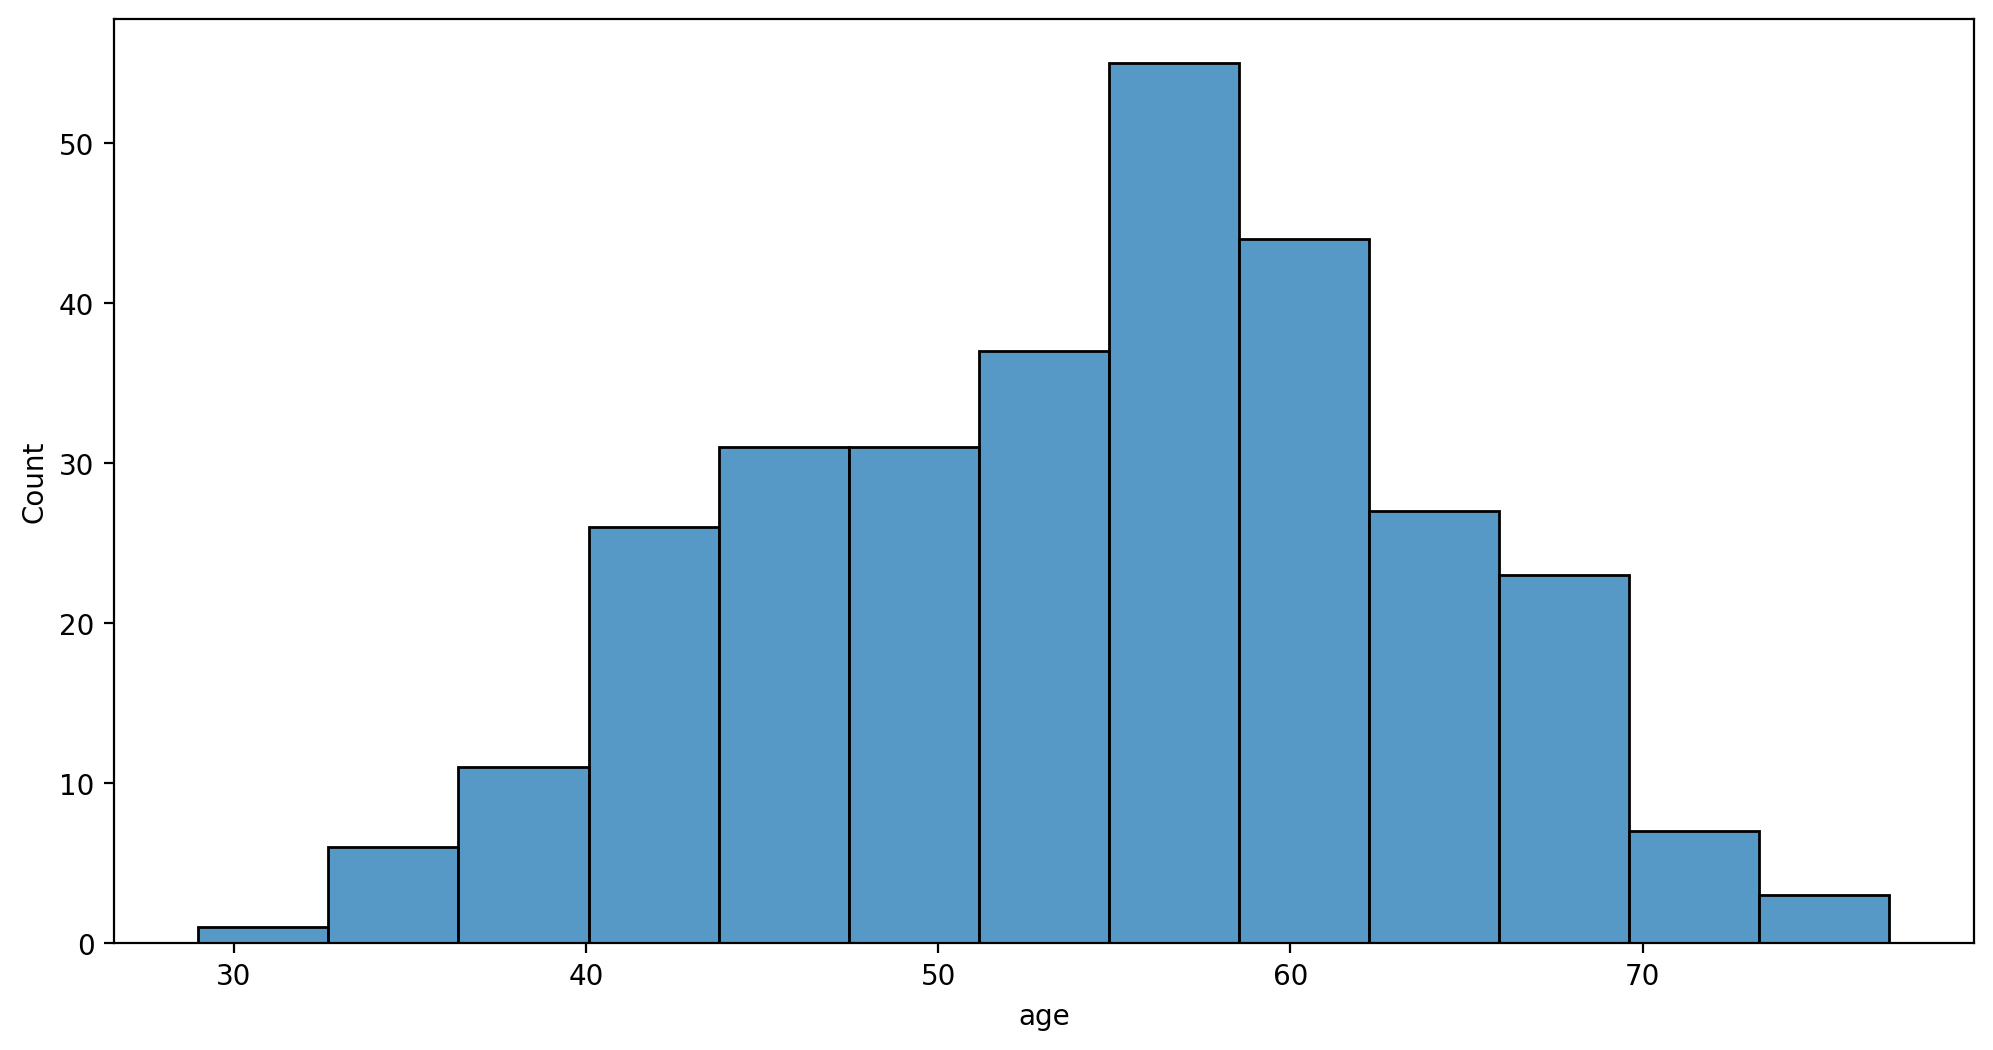

In [21]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(df.age)
plt.show()

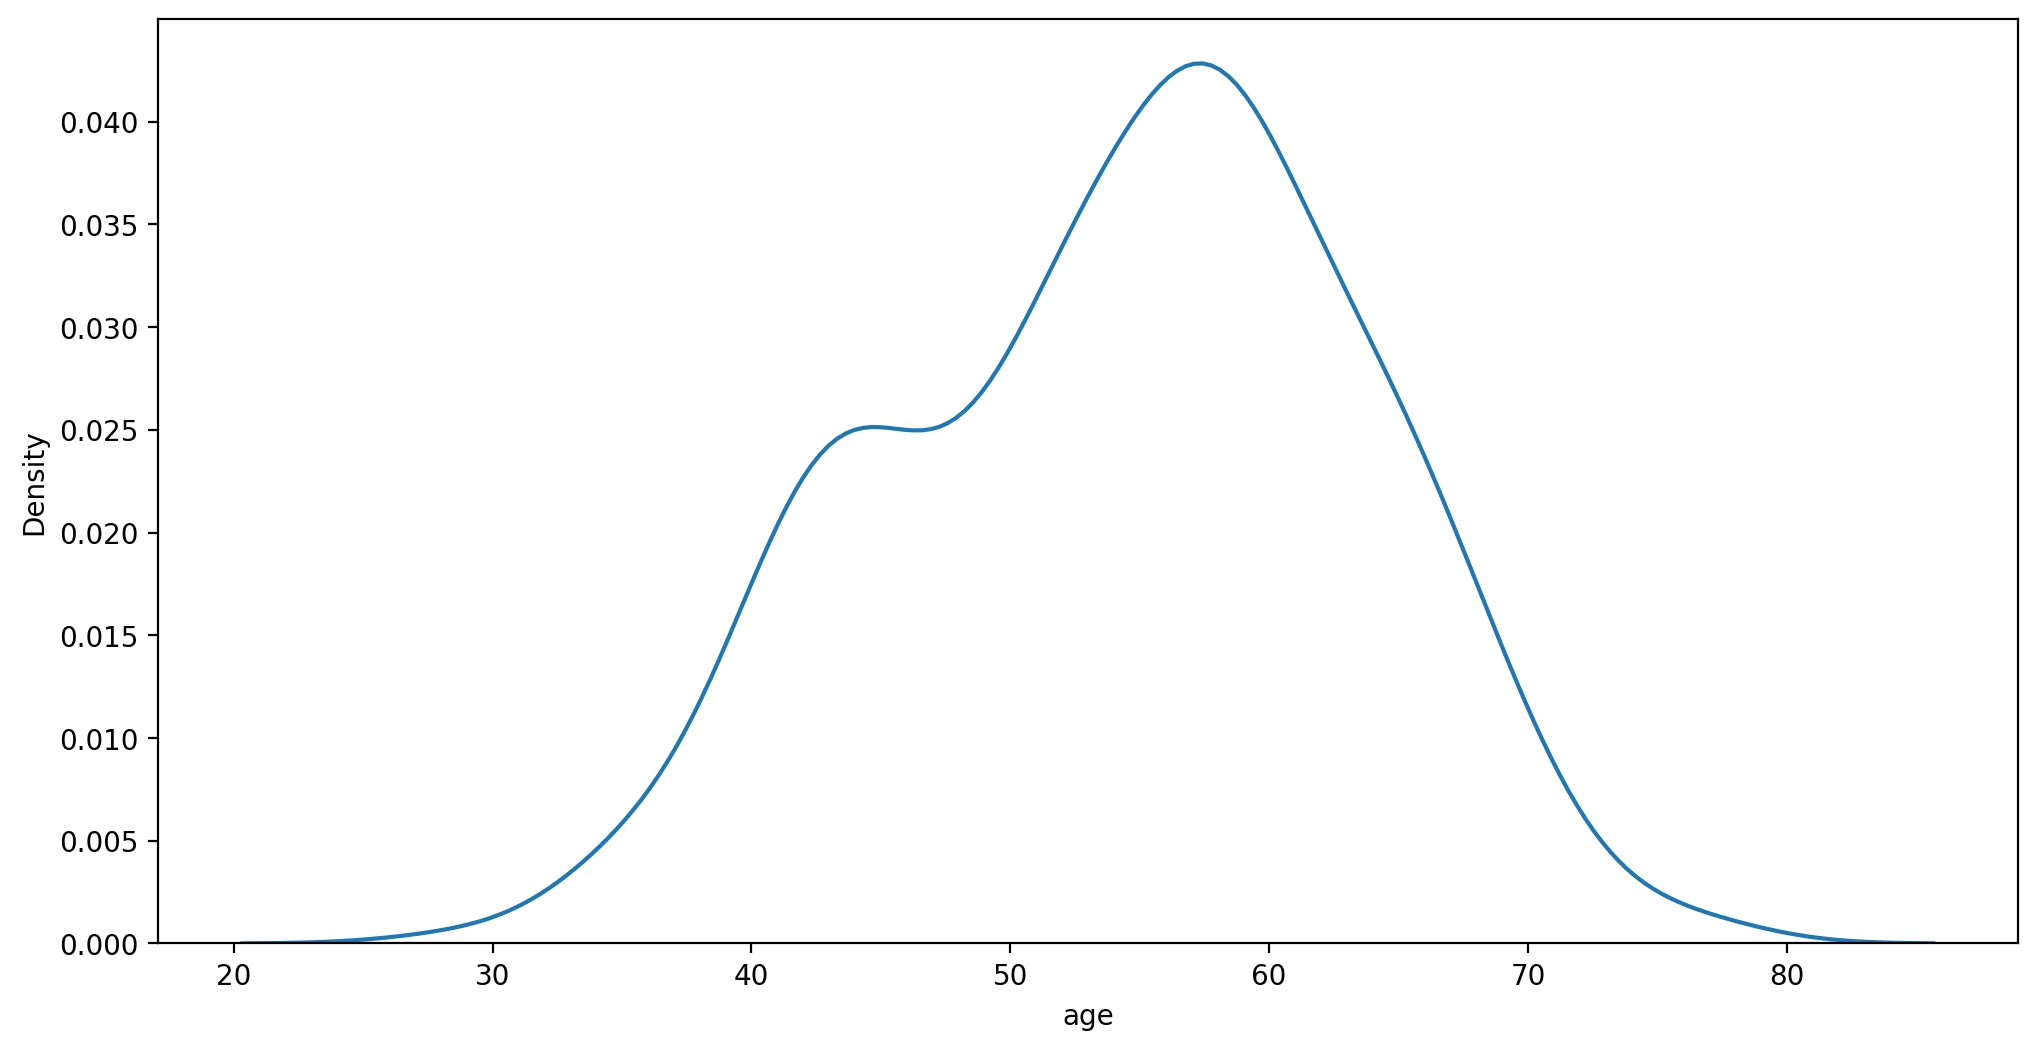

In [22]:
plt.figure(figsize=(12,6),dpi=200)
sns.distplot(df.age,hist= False)
plt.show()

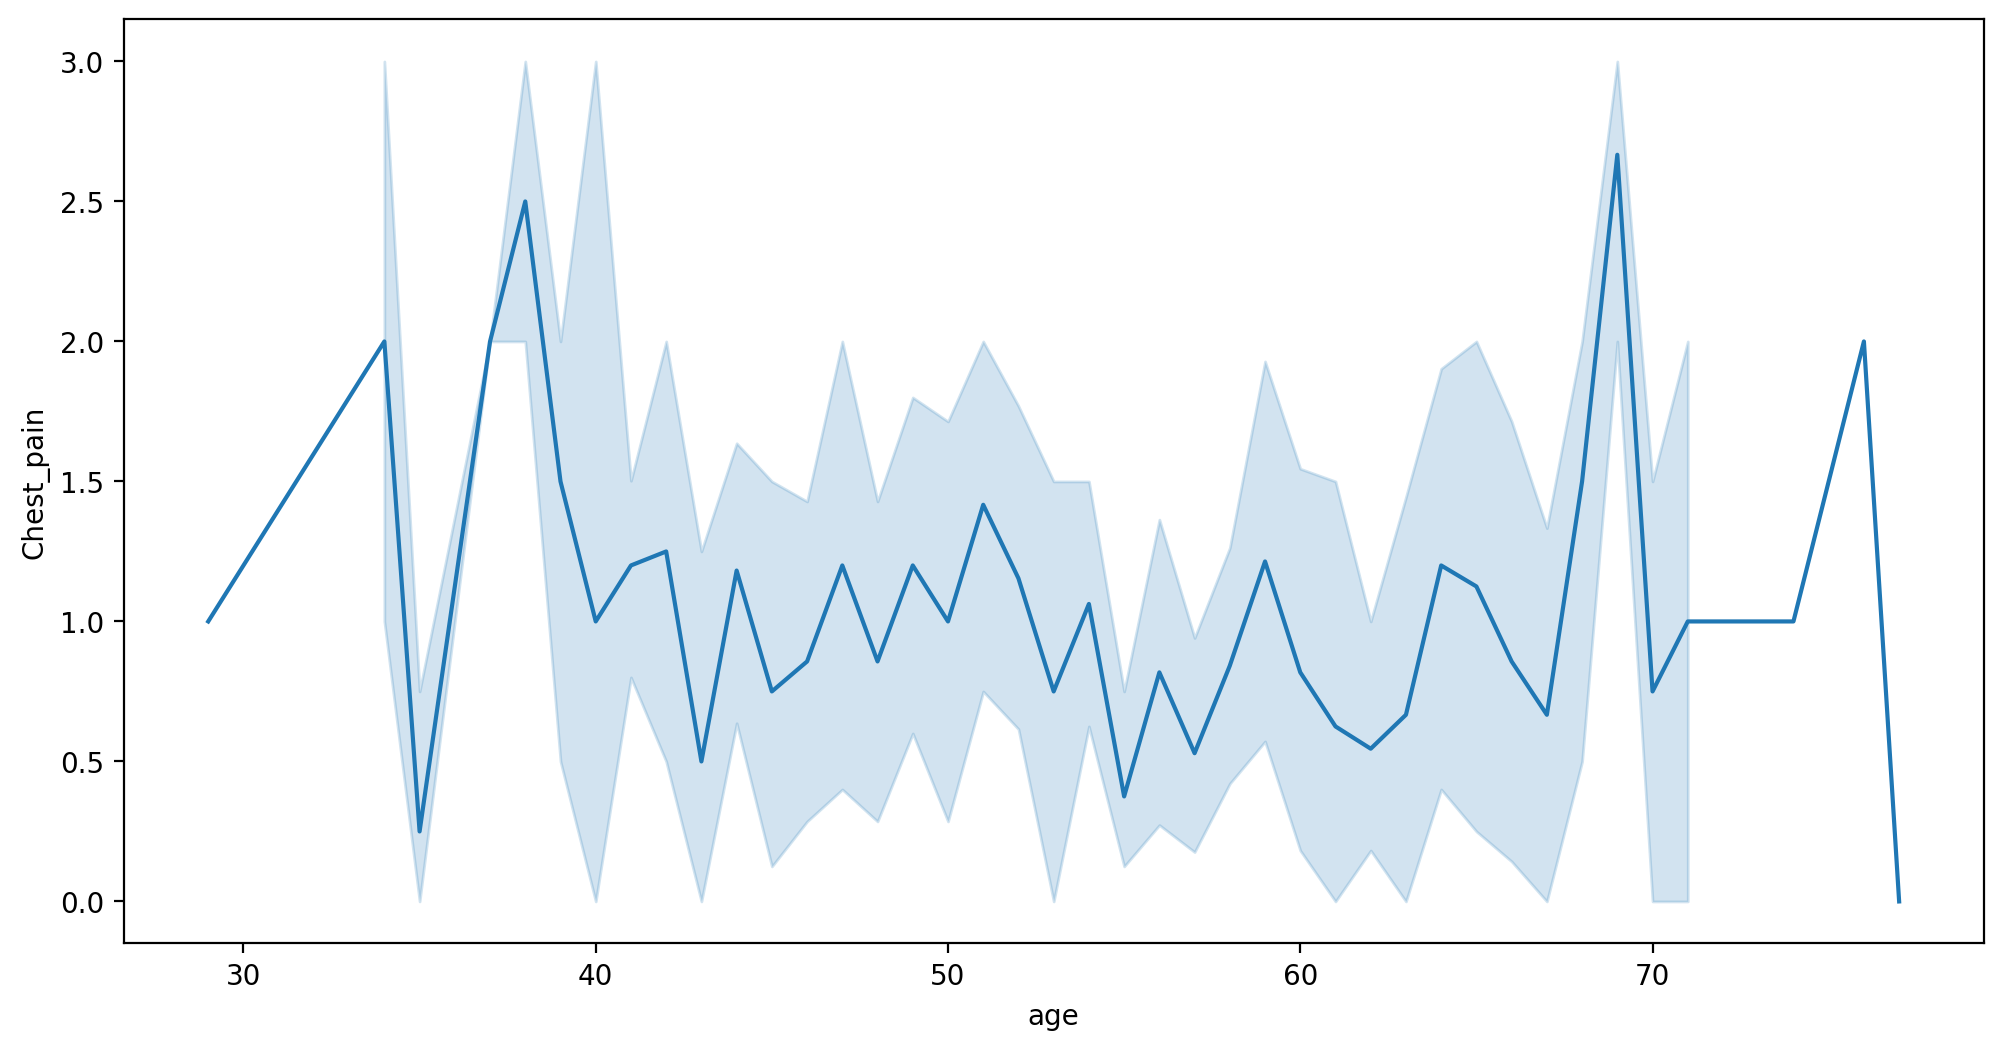

In [23]:
plt.figure(figsize=(12,6),dpi=200)
sns.lineplot('age','Chest_pain',data =df)
plt.show()

In [24]:
df.age.describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

## ANALYSING SEX COLUMN

In [25]:
df.sex.unique()

array([1, 0], dtype=int64)

In [26]:
df.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

1 represents male ,<br> 0 represents female,means More number of Males are in dataset

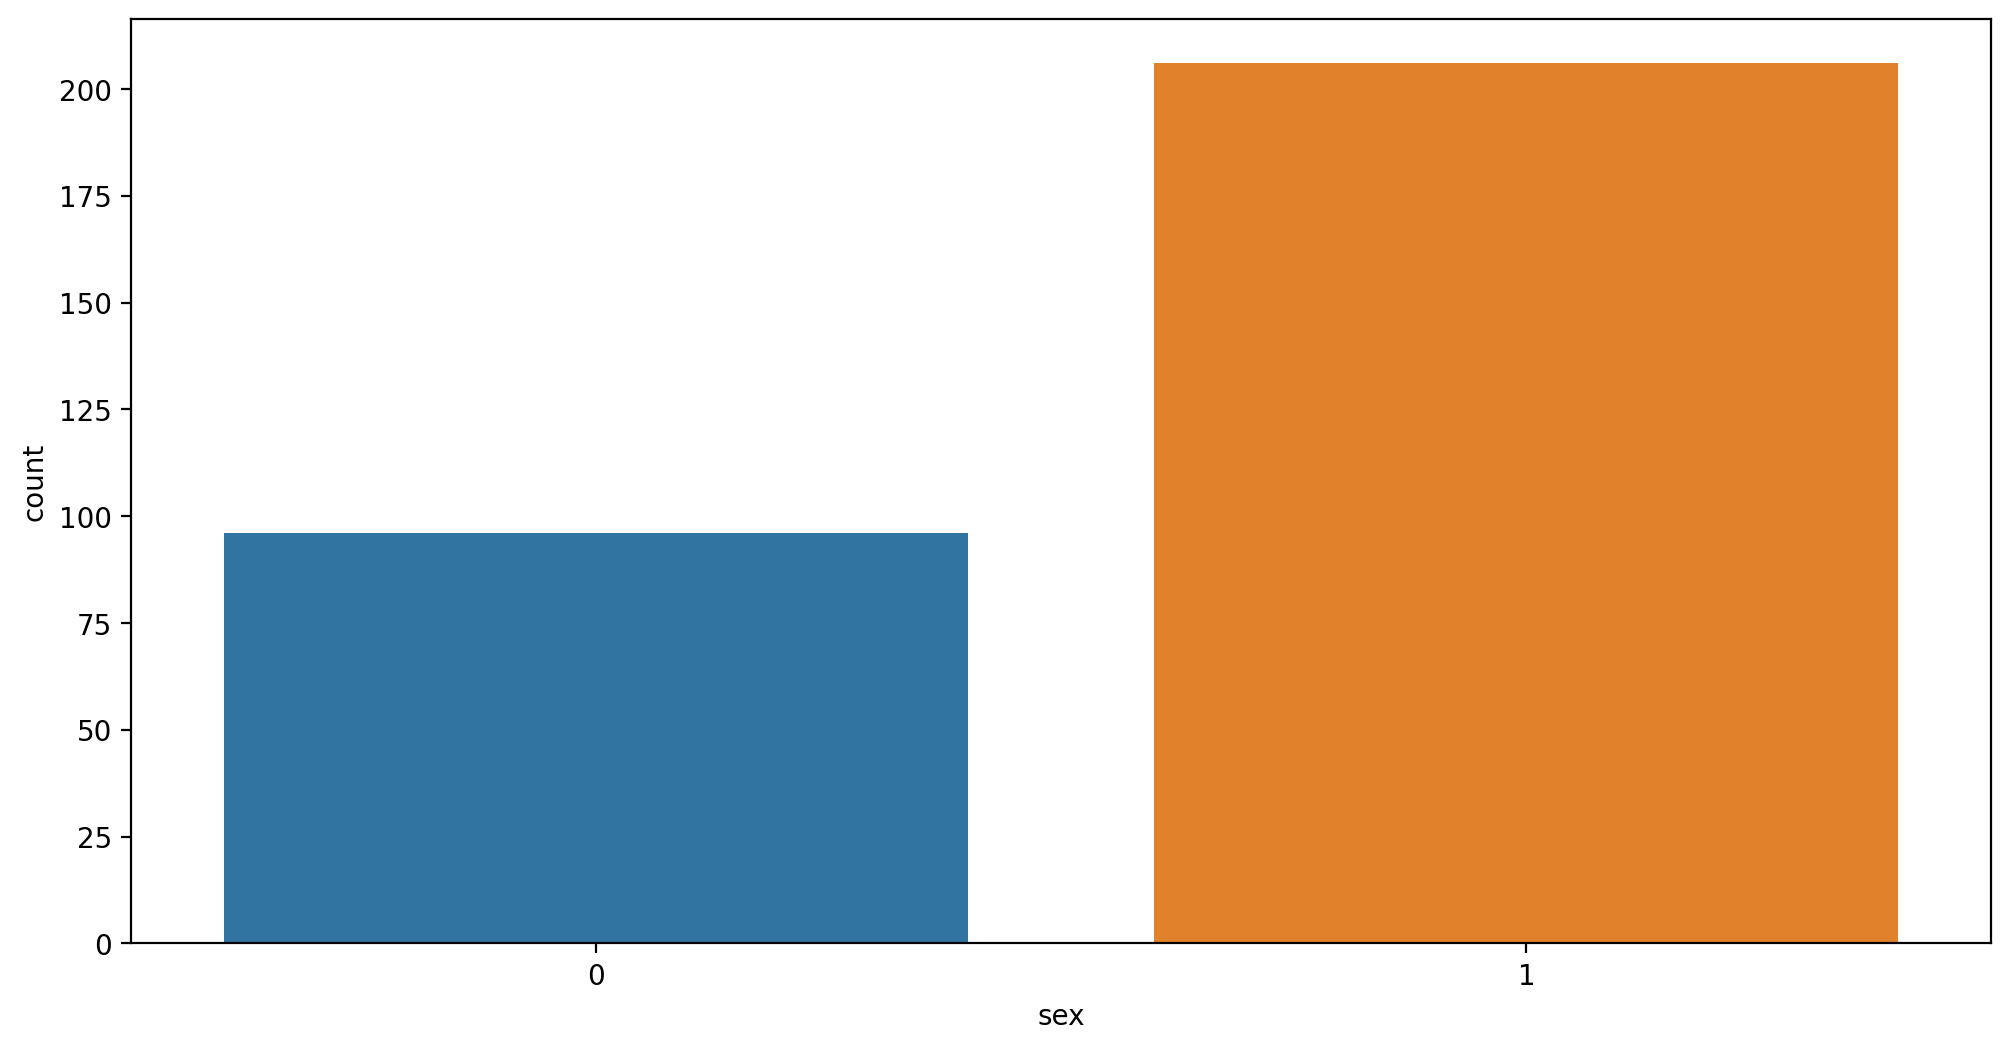

In [27]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(df.sex)
plt.show()

## ANALYSING CHEST PAIN COLUMN

In [28]:
df.Chest_pain

0      0
1      0
2      0
3      0
4      0
      ..
723    2
733    2
739    0
843    3
878    0
Name: Chest_pain, Length: 302, dtype: int64

In [29]:
df.Chest_pain.unique()

array([0, 1, 2, 3], dtype=int64)

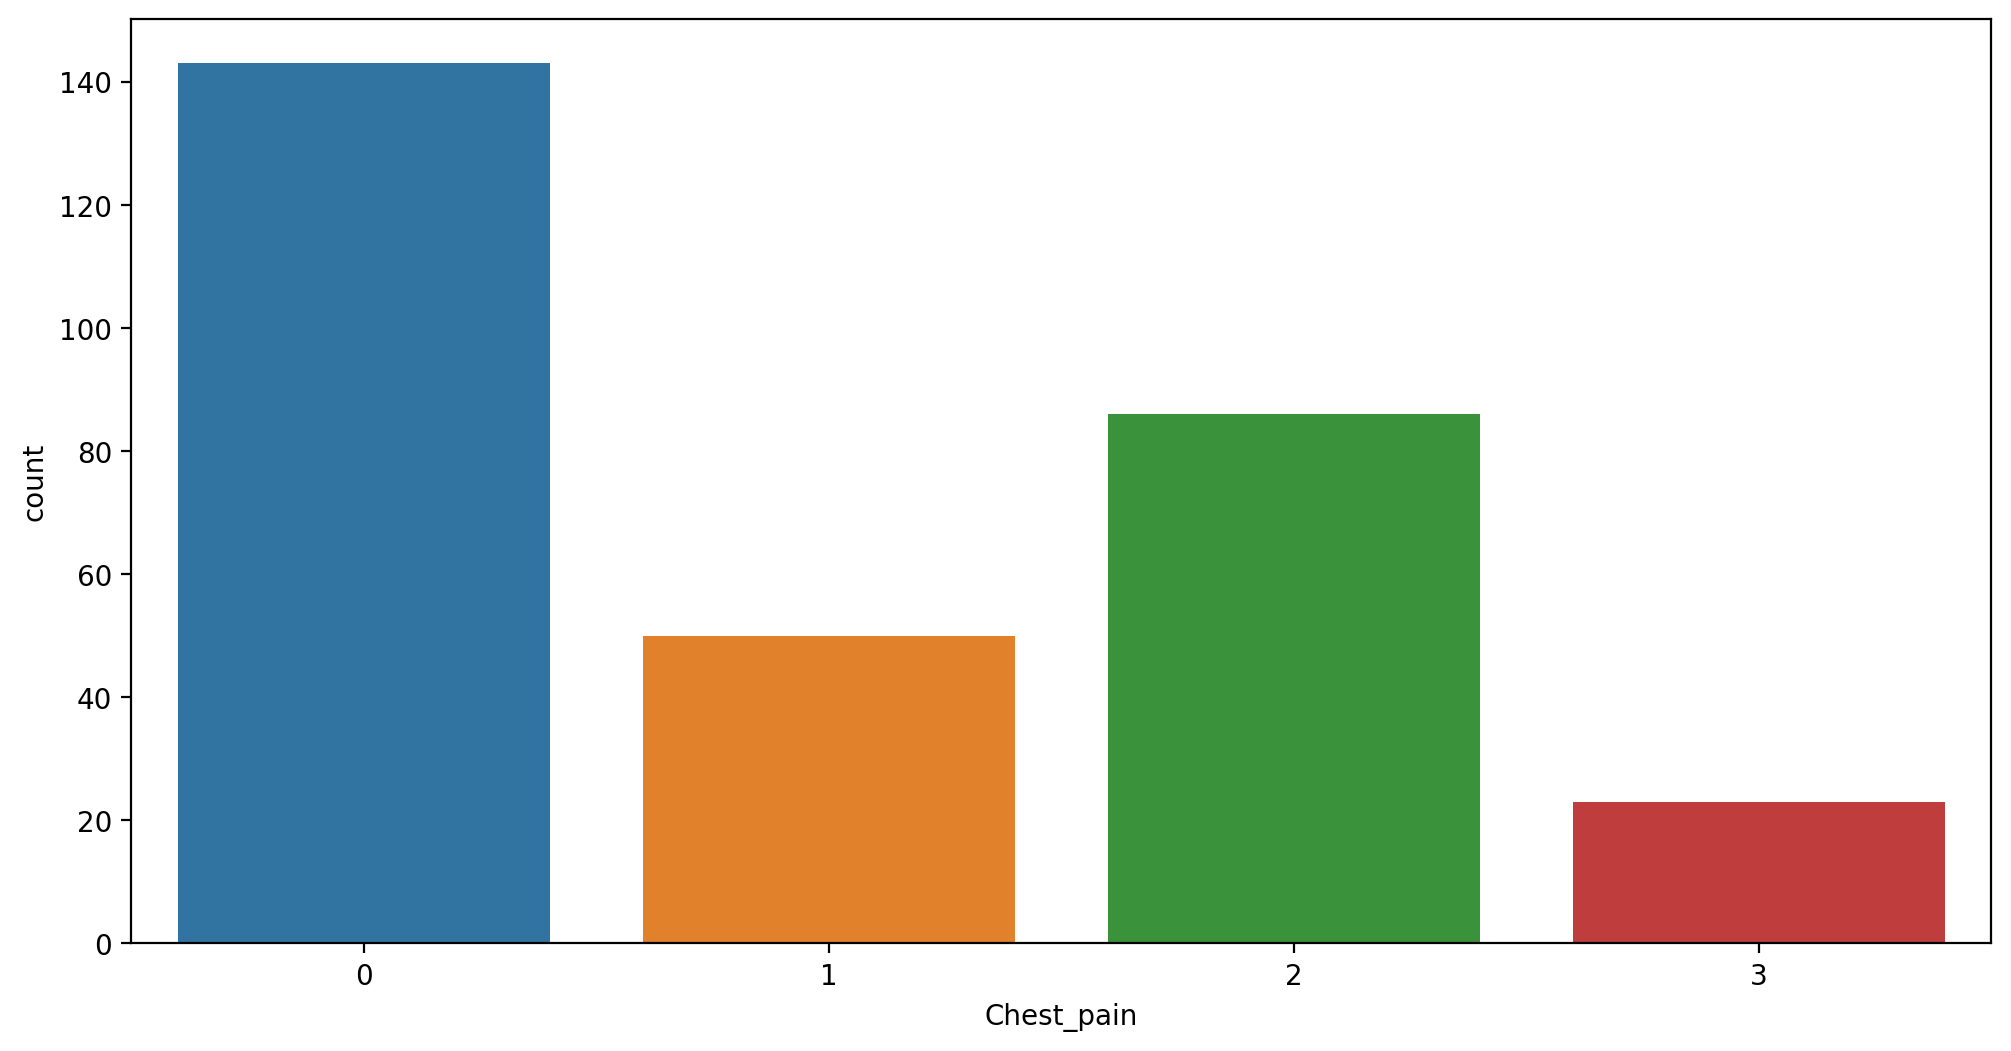

In [30]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(df.Chest_pain)
plt.show()

In [31]:
df.Chest_pain.value_counts()

0    143
2     86
1     50
3     23
Name: Chest_pain, dtype: int64

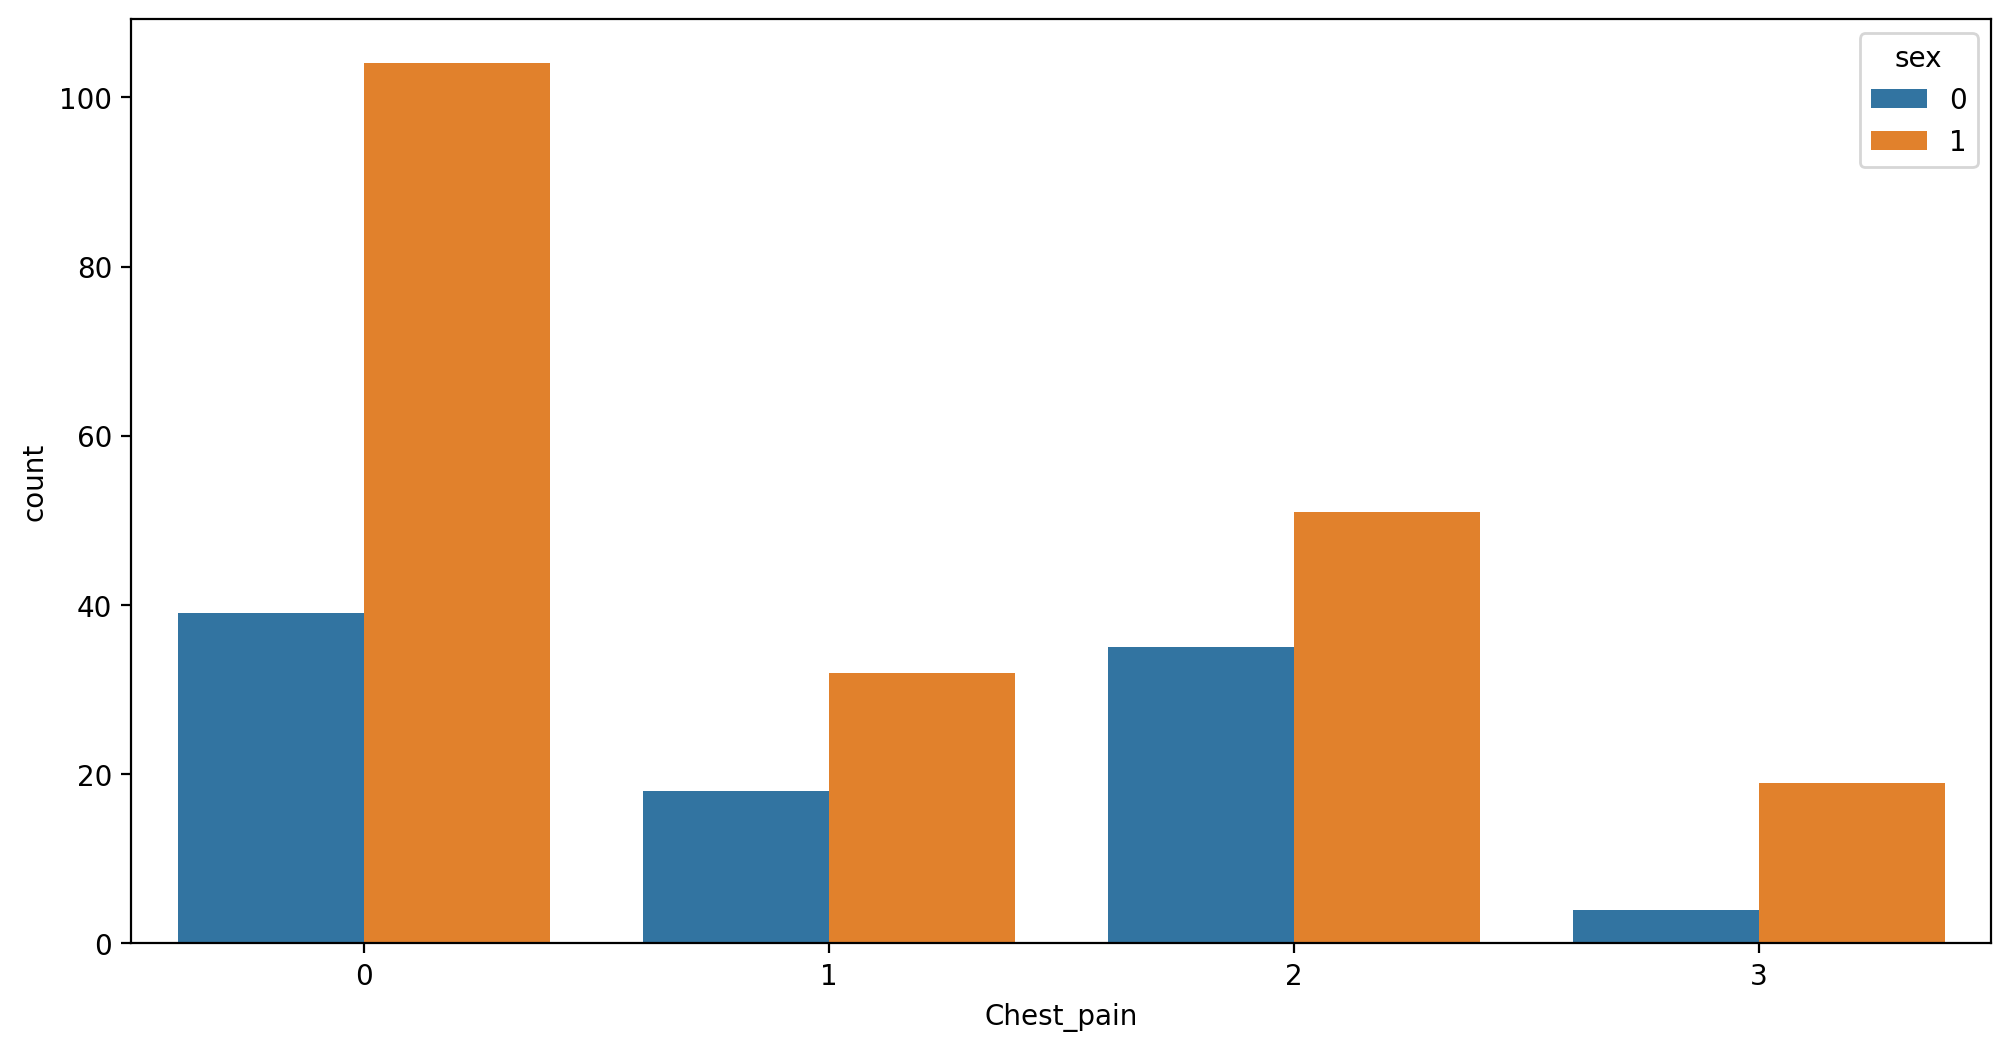

In [32]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('Chest_pain',data=df,hue='sex')
plt.show()

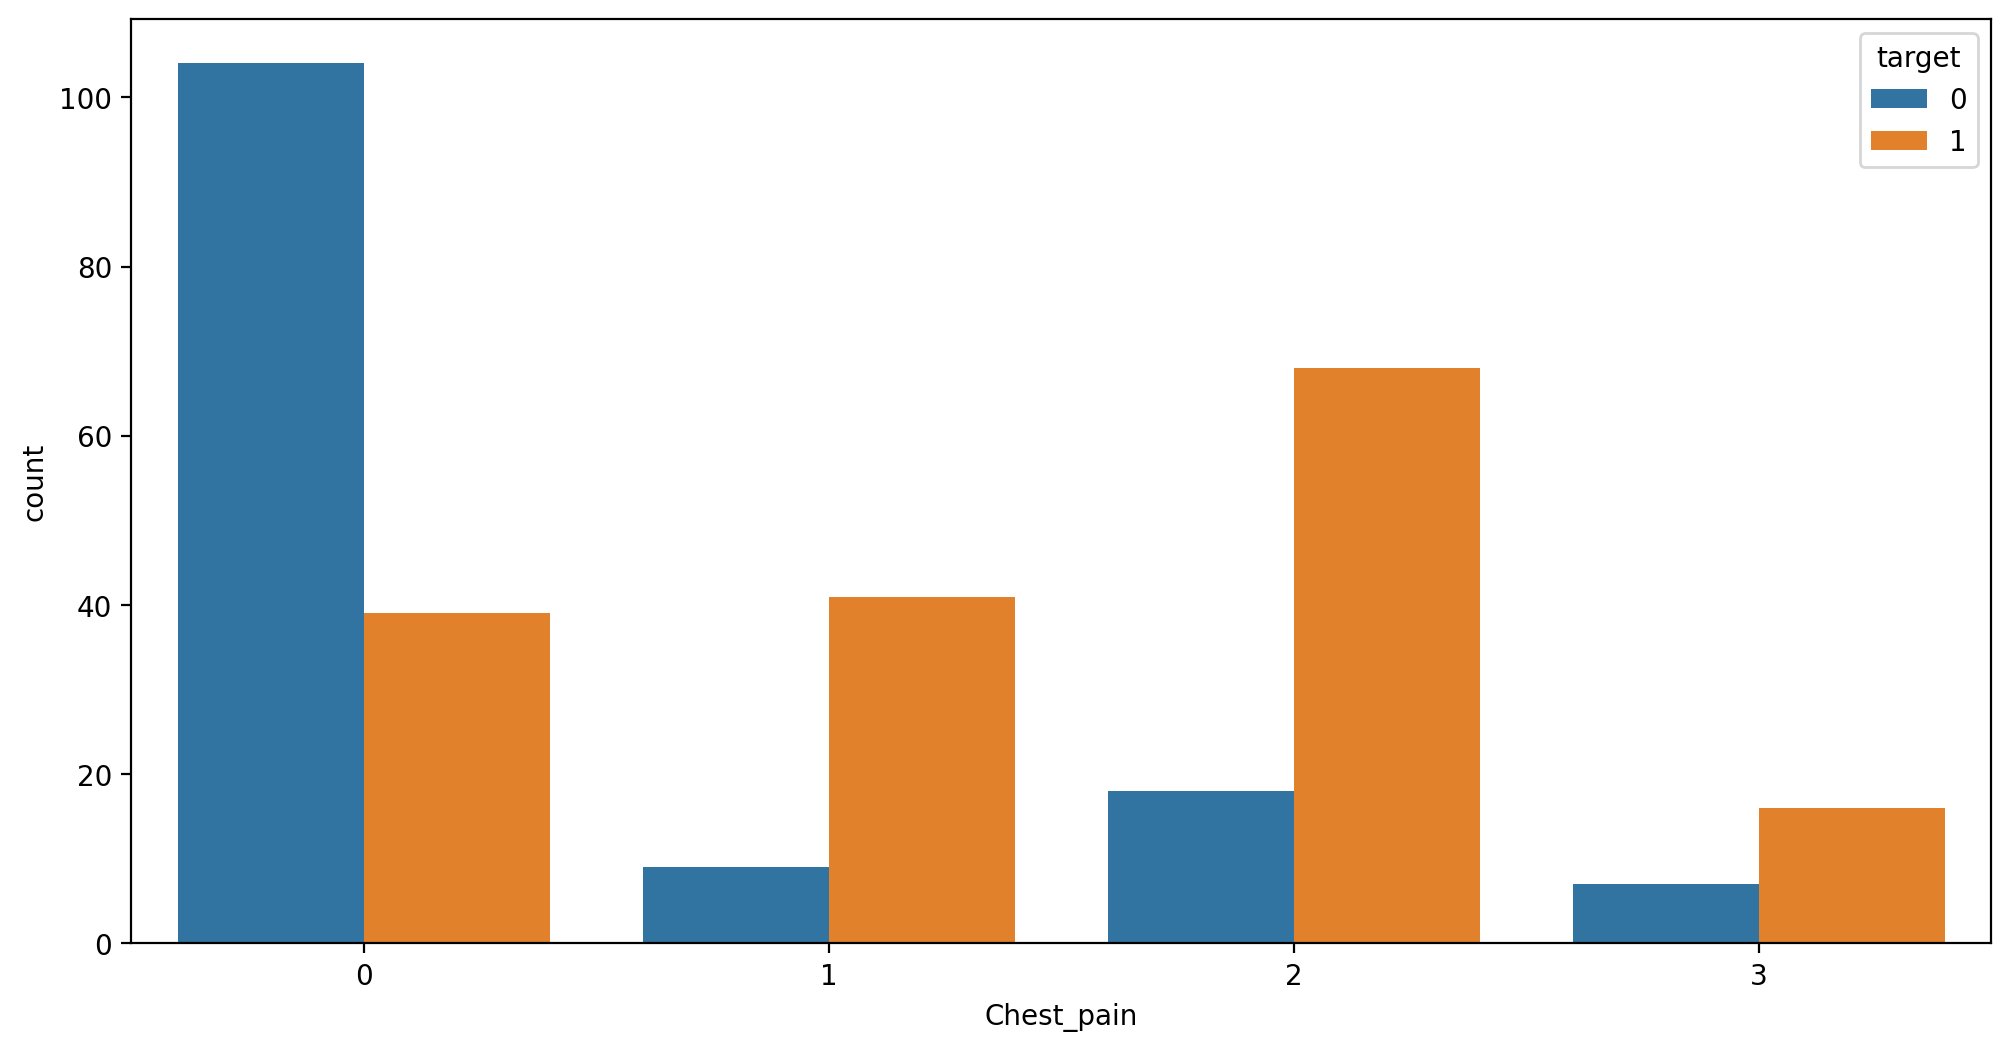

In [33]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('Chest_pain',data=df,hue='target')
plt.show()

In [34]:
df.groupby(['target','sex'])['Chest_pain'].value_counts()

target  sex  Chest_pain
0       0    0             21
             1              2
             2              1
        1    0             83
             2             17
             1              7
             3              7
1       0    2             34
             0             18
             1             16
             3              4
        1    2             34
             1             25
             0             21
             3             12
Name: Chest_pain, dtype: int64

In [35]:
df

,age,sex,Chest_pain,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [36]:
df.trestbps.unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101], dtype=int64)

In [37]:
df.trestbps.describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

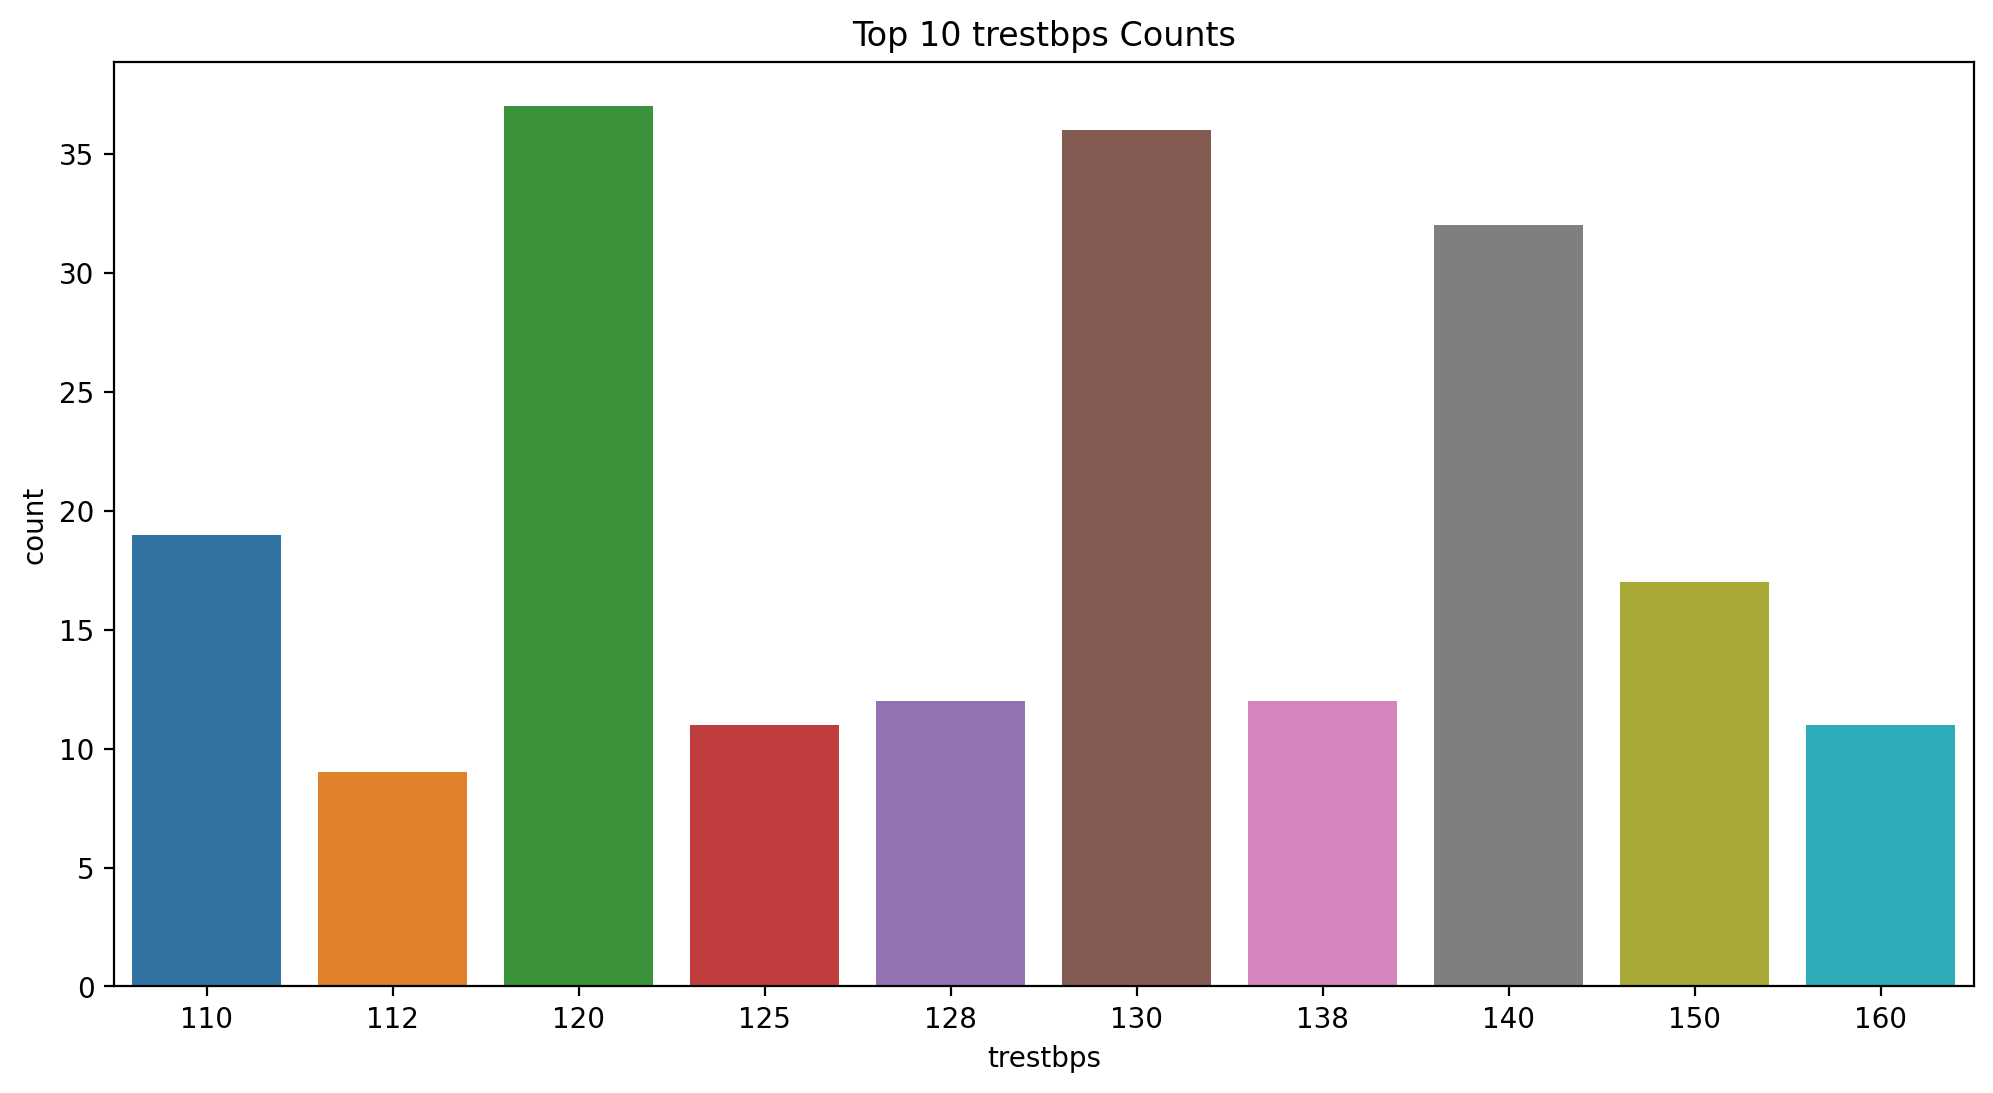

In [38]:
s = df['trestbps'].value_counts().head(10)
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=s.index,y=s.values, data=df)
plt.title('Top 10 trestbps Counts')
plt.xlabel("trestbps")
plt.ylabel("count")
plt.show()

In [39]:
df

,age,sex,Chest_pain,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


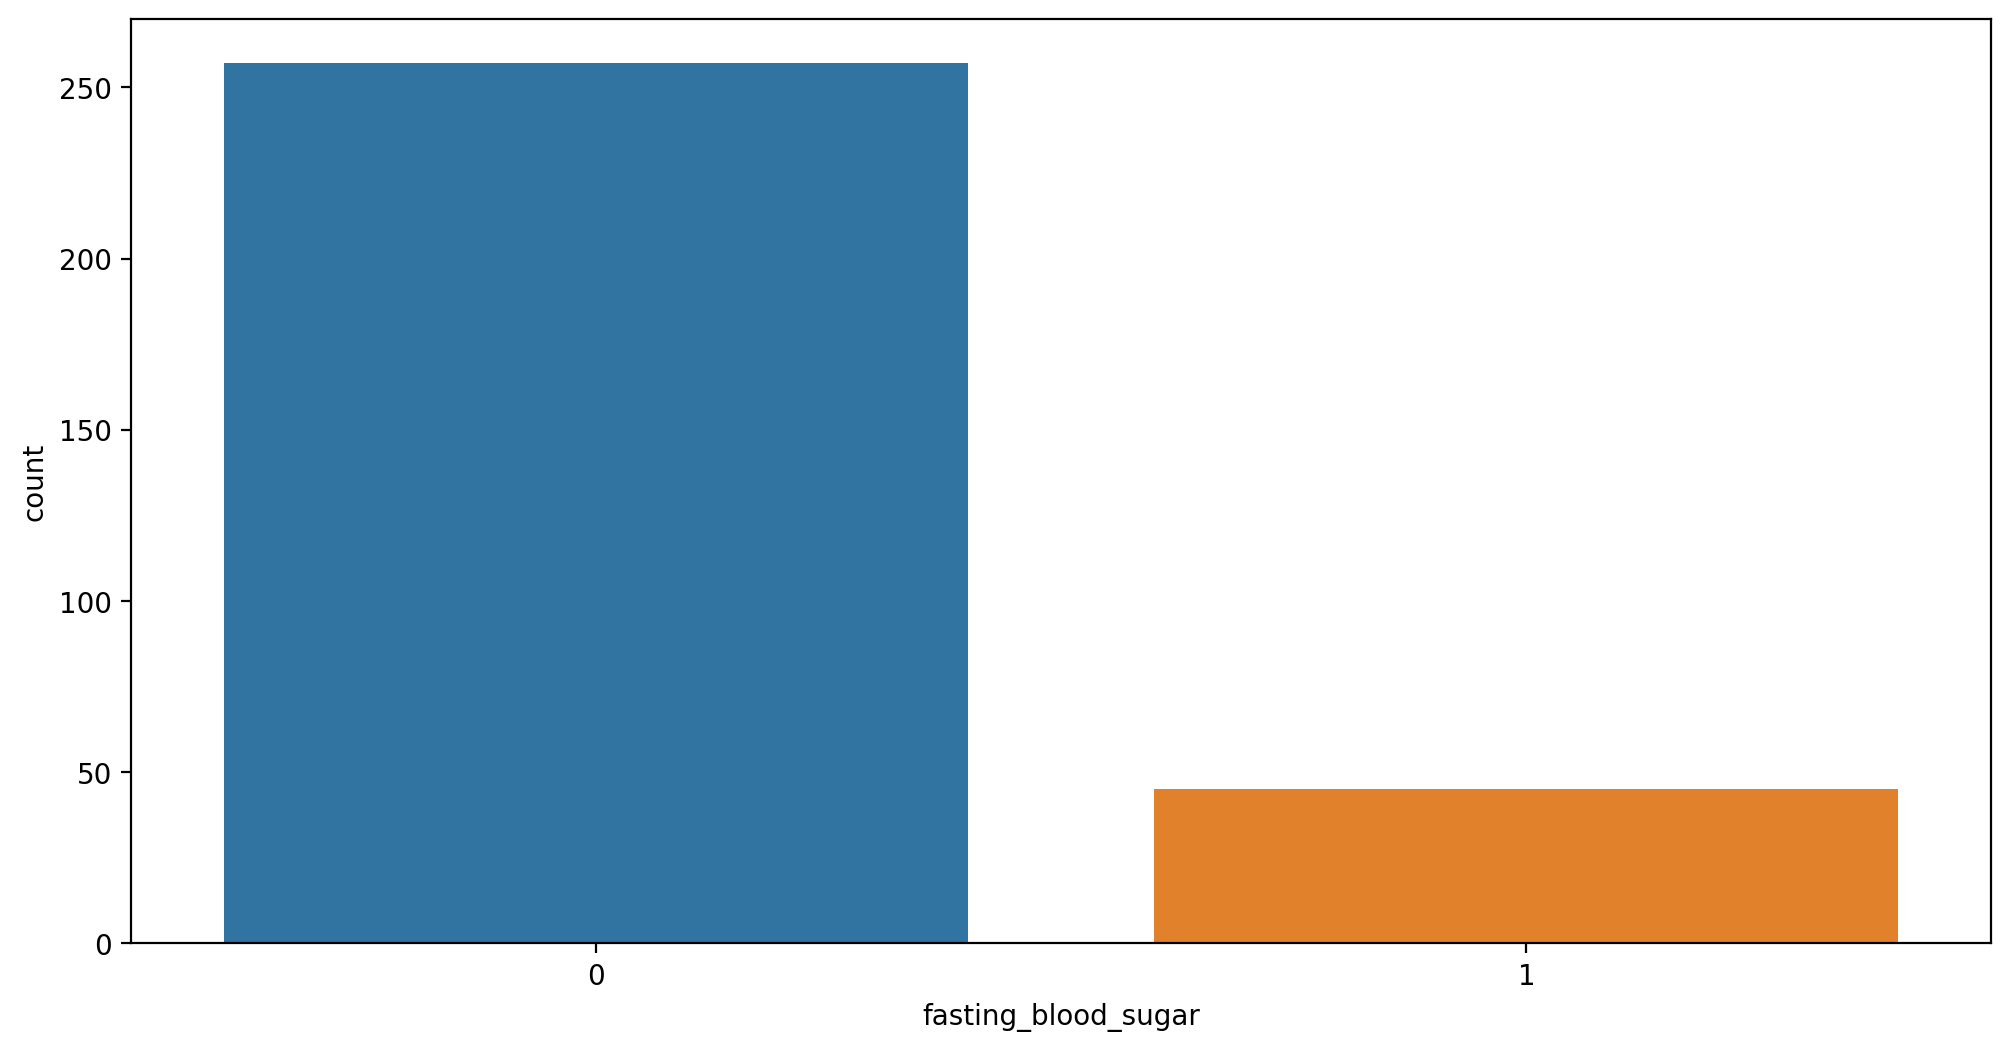

In [40]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('fasting_blood_sugar' ,data=df)
plt.show()

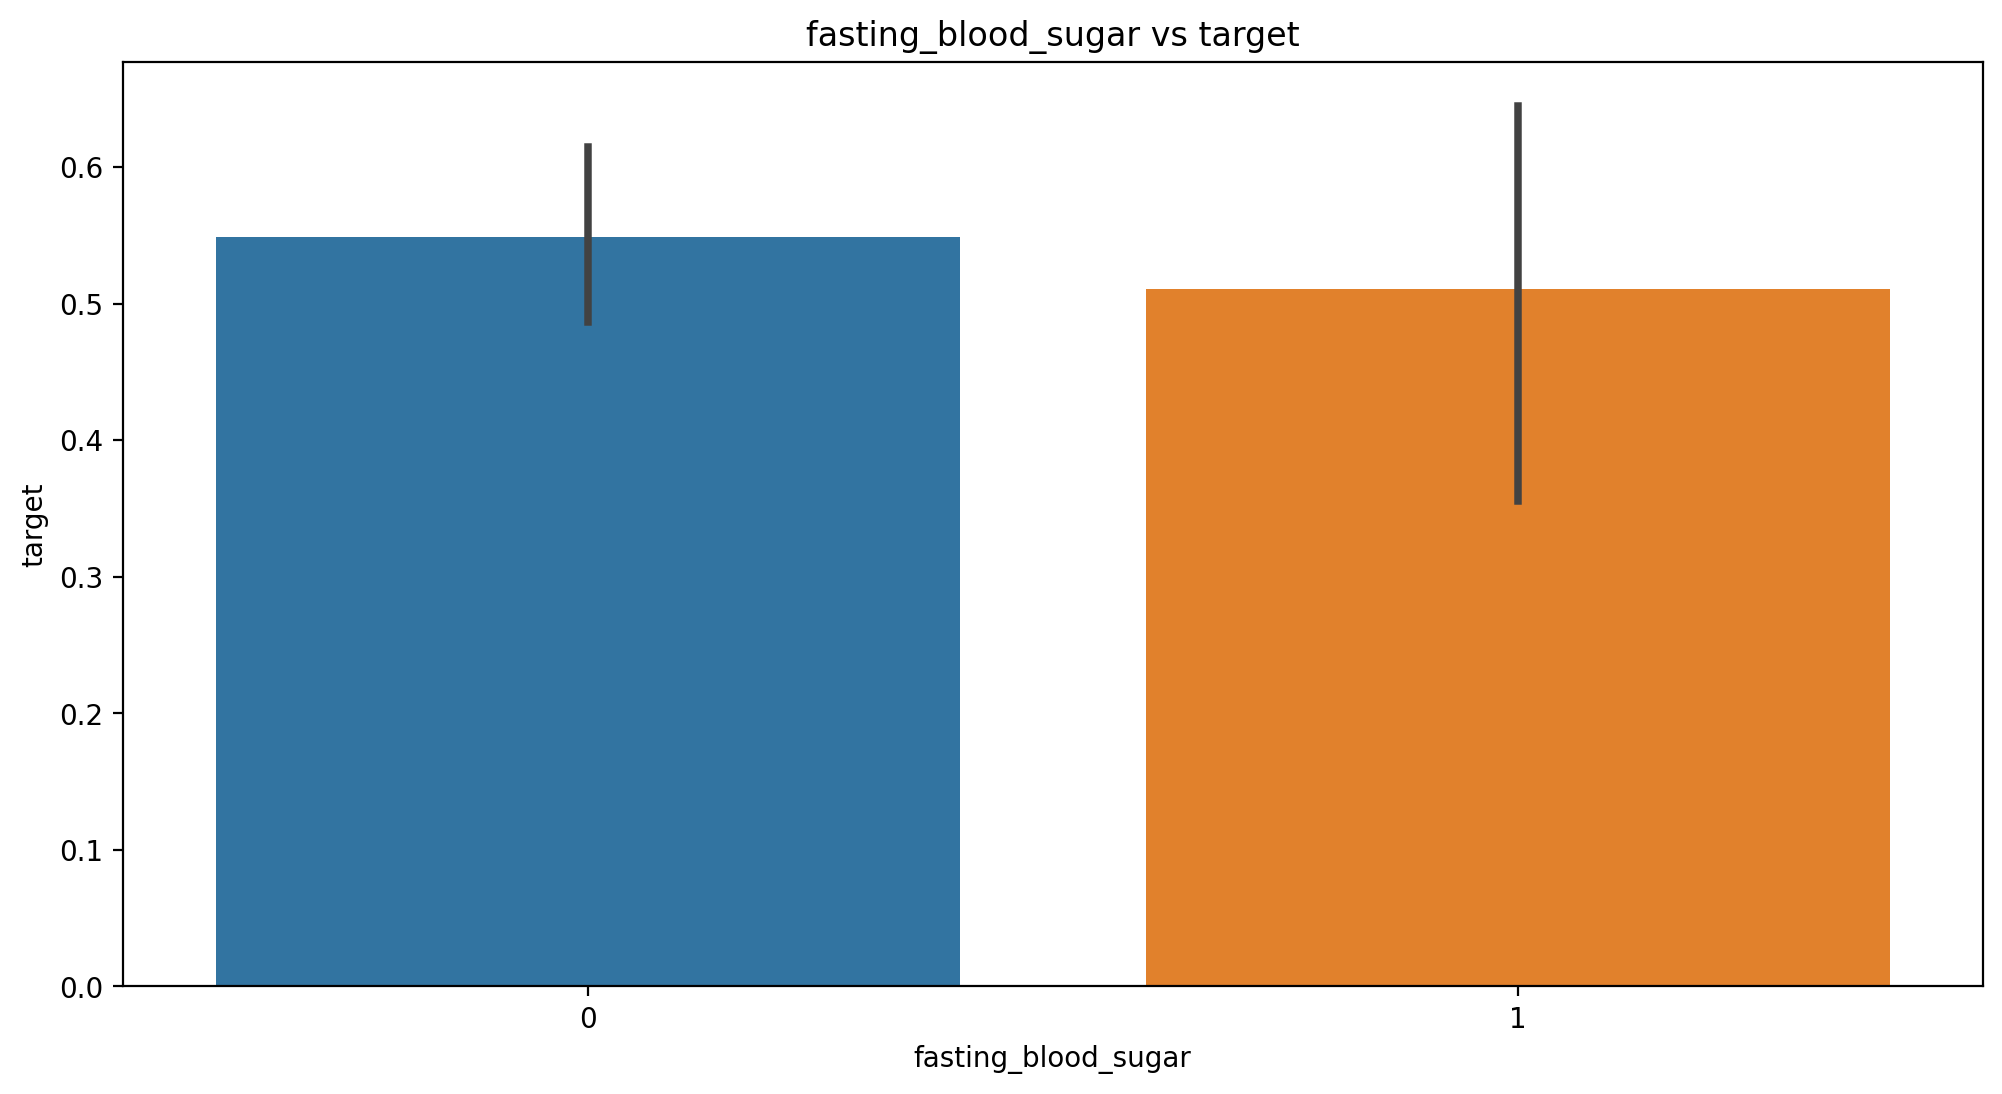

In [41]:
s = df['fasting_blood_sugar']
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(s,'target', data=df)
plt.title('fasting_blood_sugar vs target')
plt.xlabel("fasting_blood_sugar")
plt.ylabel("target")
plt.show()

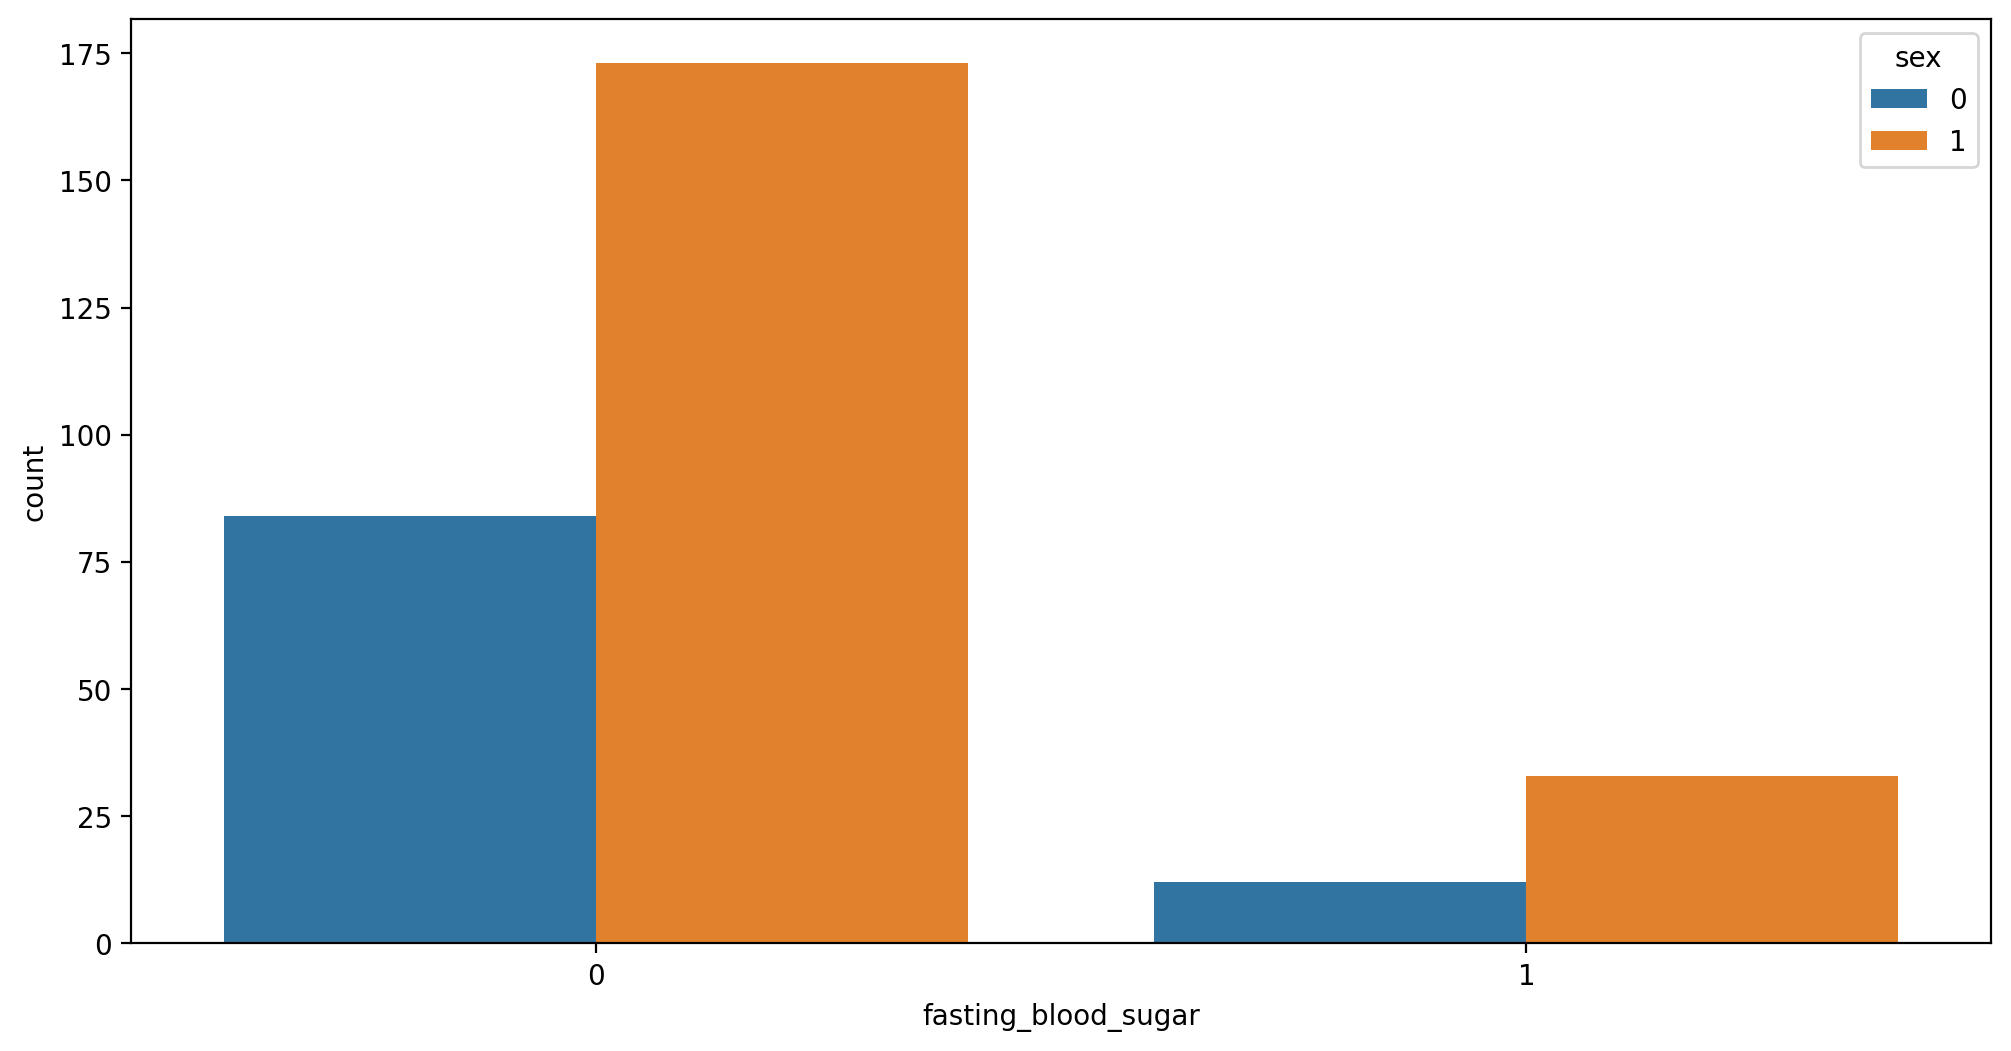

In [42]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('fasting_blood_sugar' ,data=df,hue='sex')
plt.show()

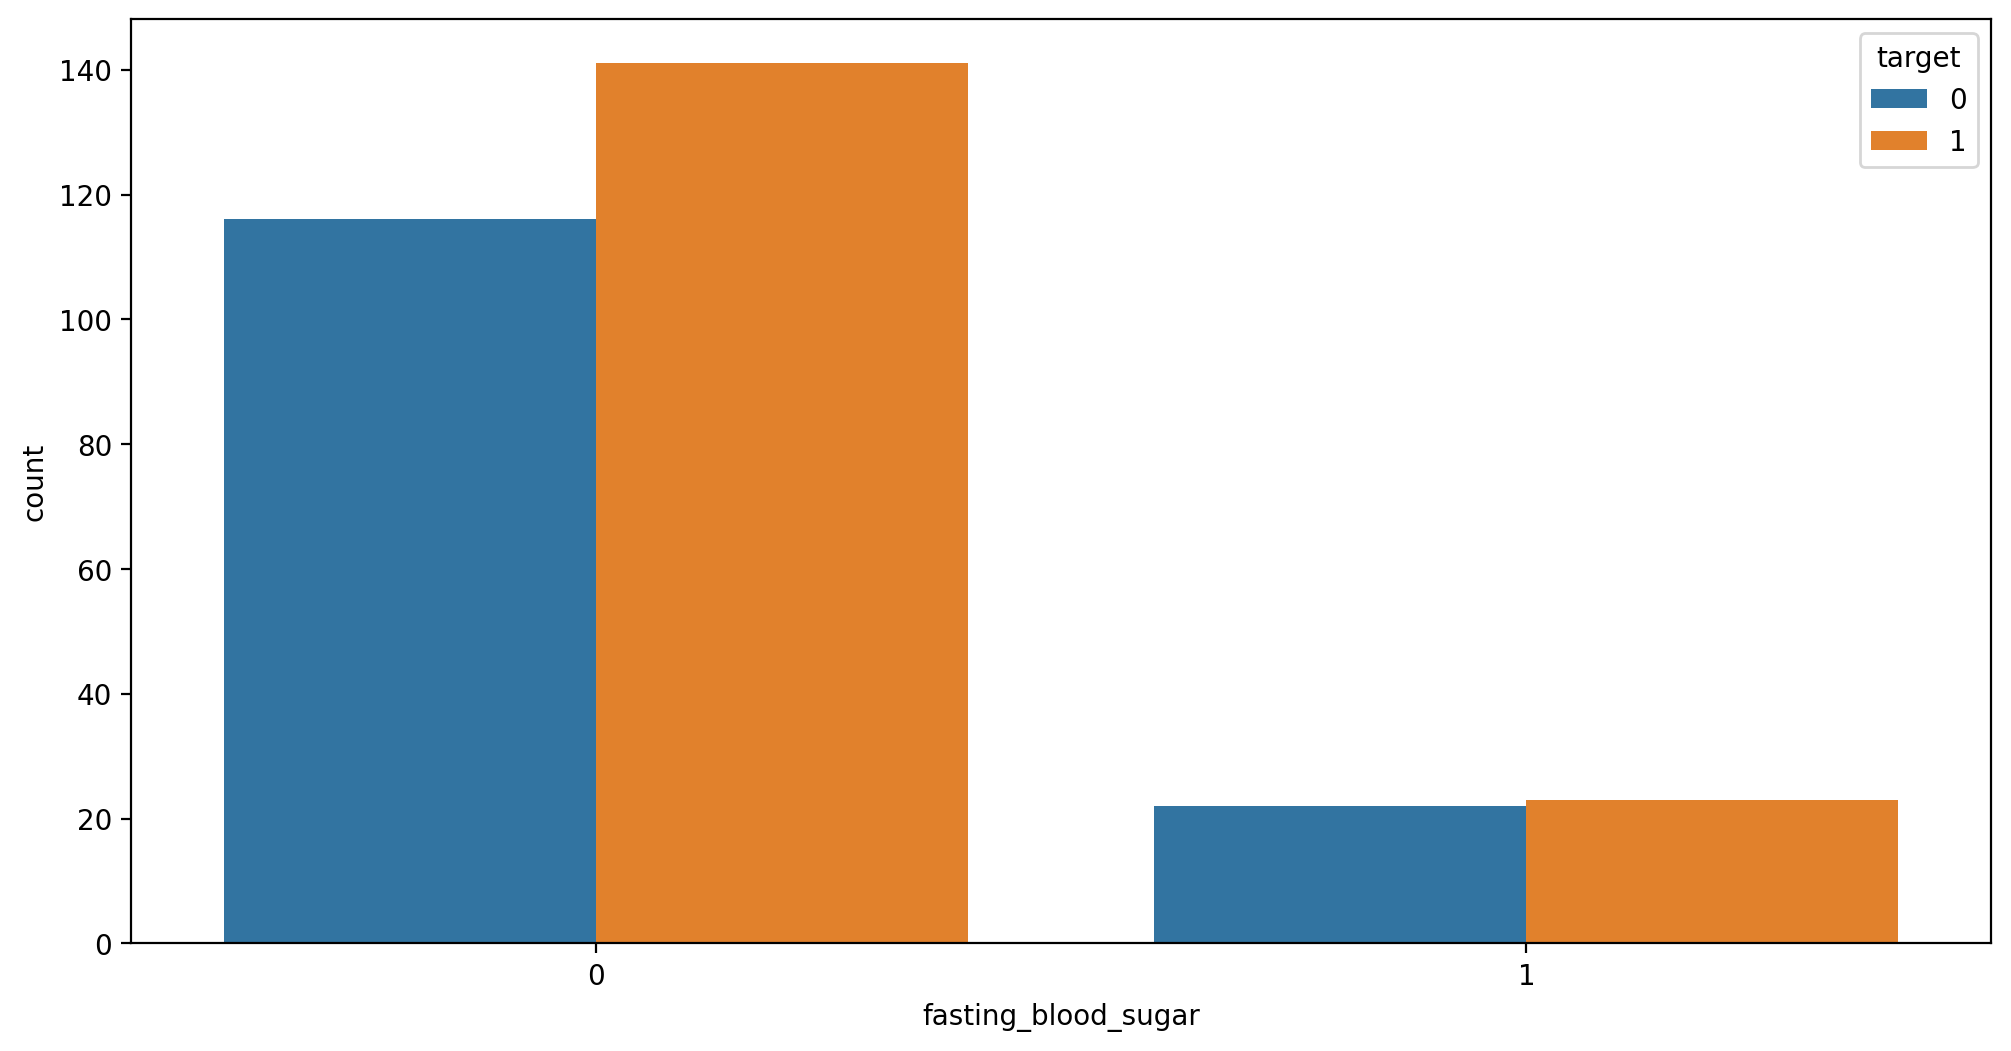

In [43]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('fasting_blood_sugar' ,data=df,hue='target')
plt.show()

### ANALYSING restecg COLUMN  ''RESTING ECG'

In [44]:
df.restecg.unique()


array([1, 0, 2], dtype=int64)

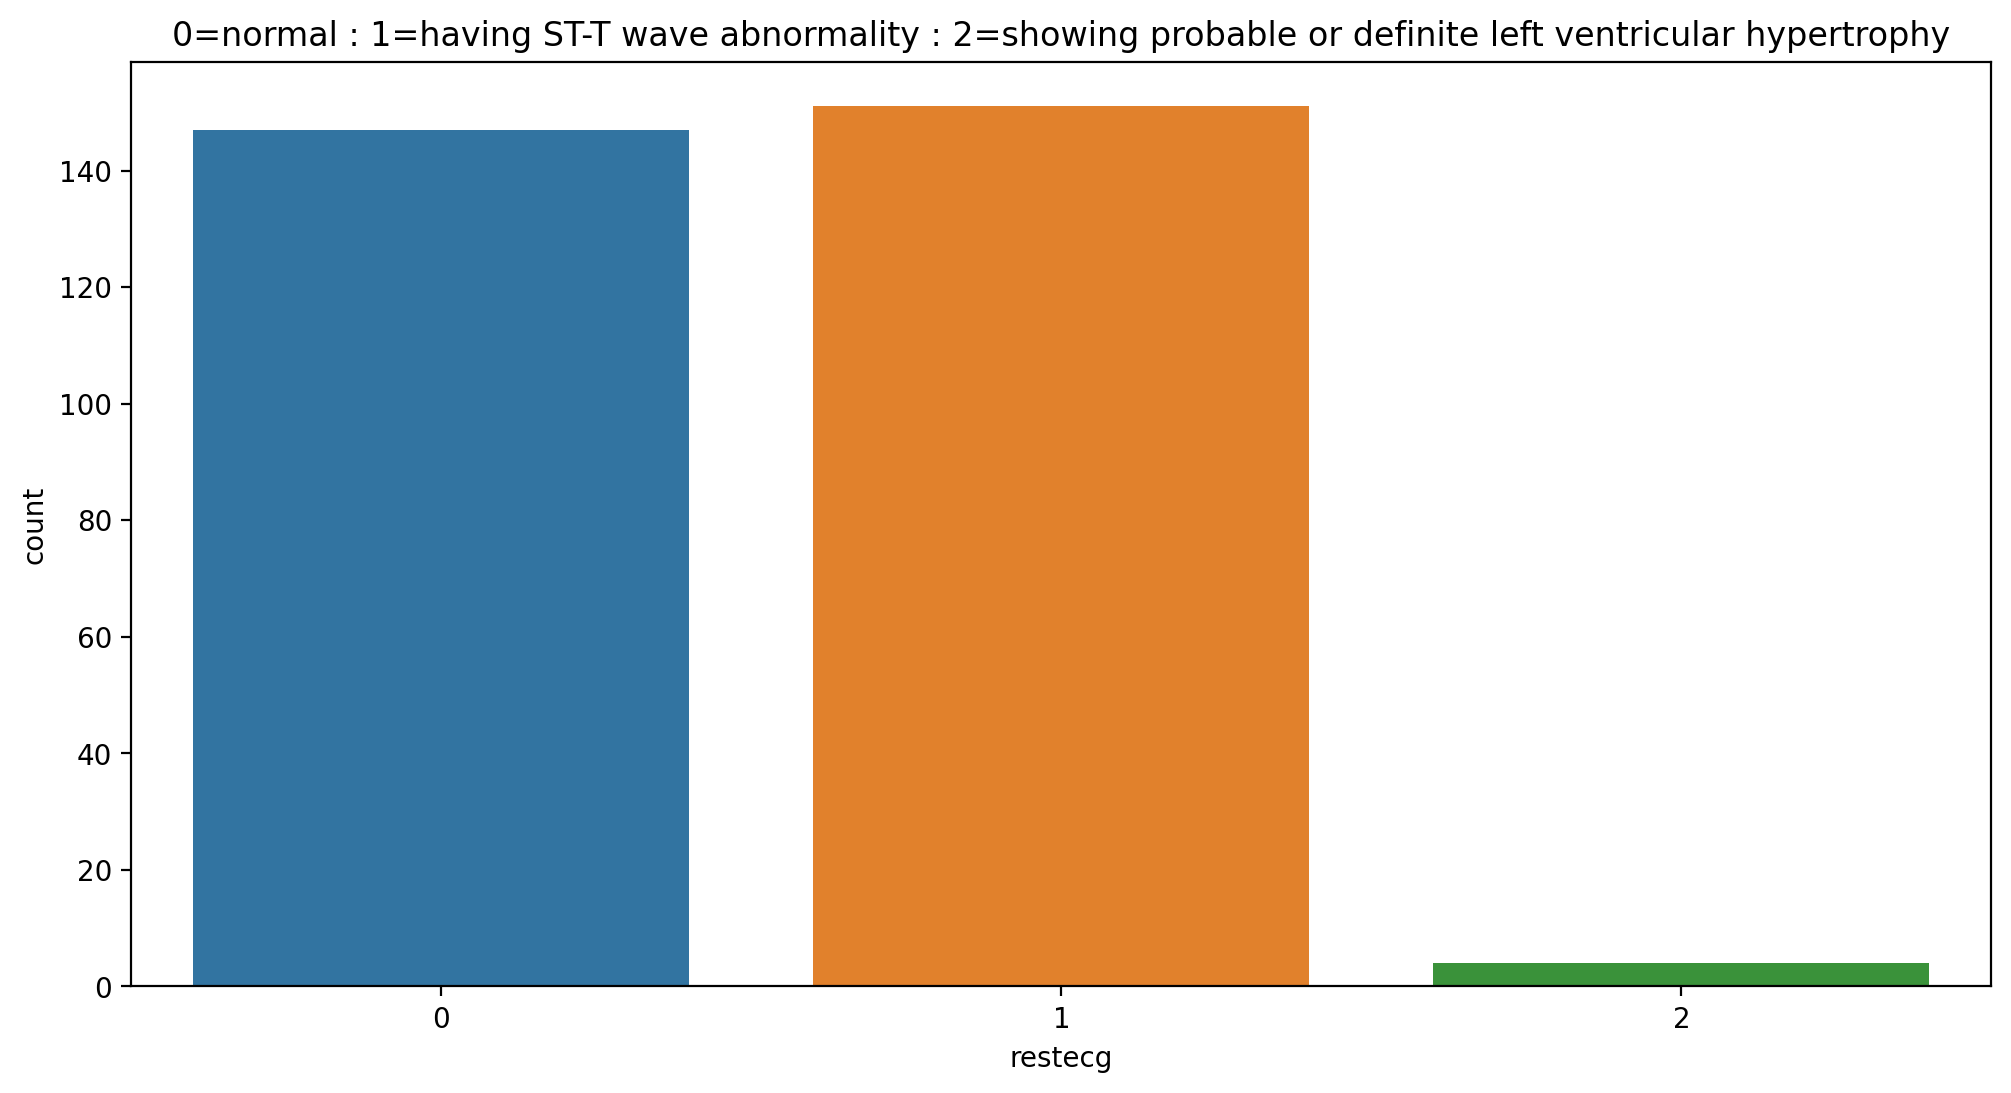

In [45]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('restecg' ,data=df)
plt.title("0=normal : 1=having ST-T wave abnormality : 2=showing probable or definite left ventricular hypertrophy")
plt.show()

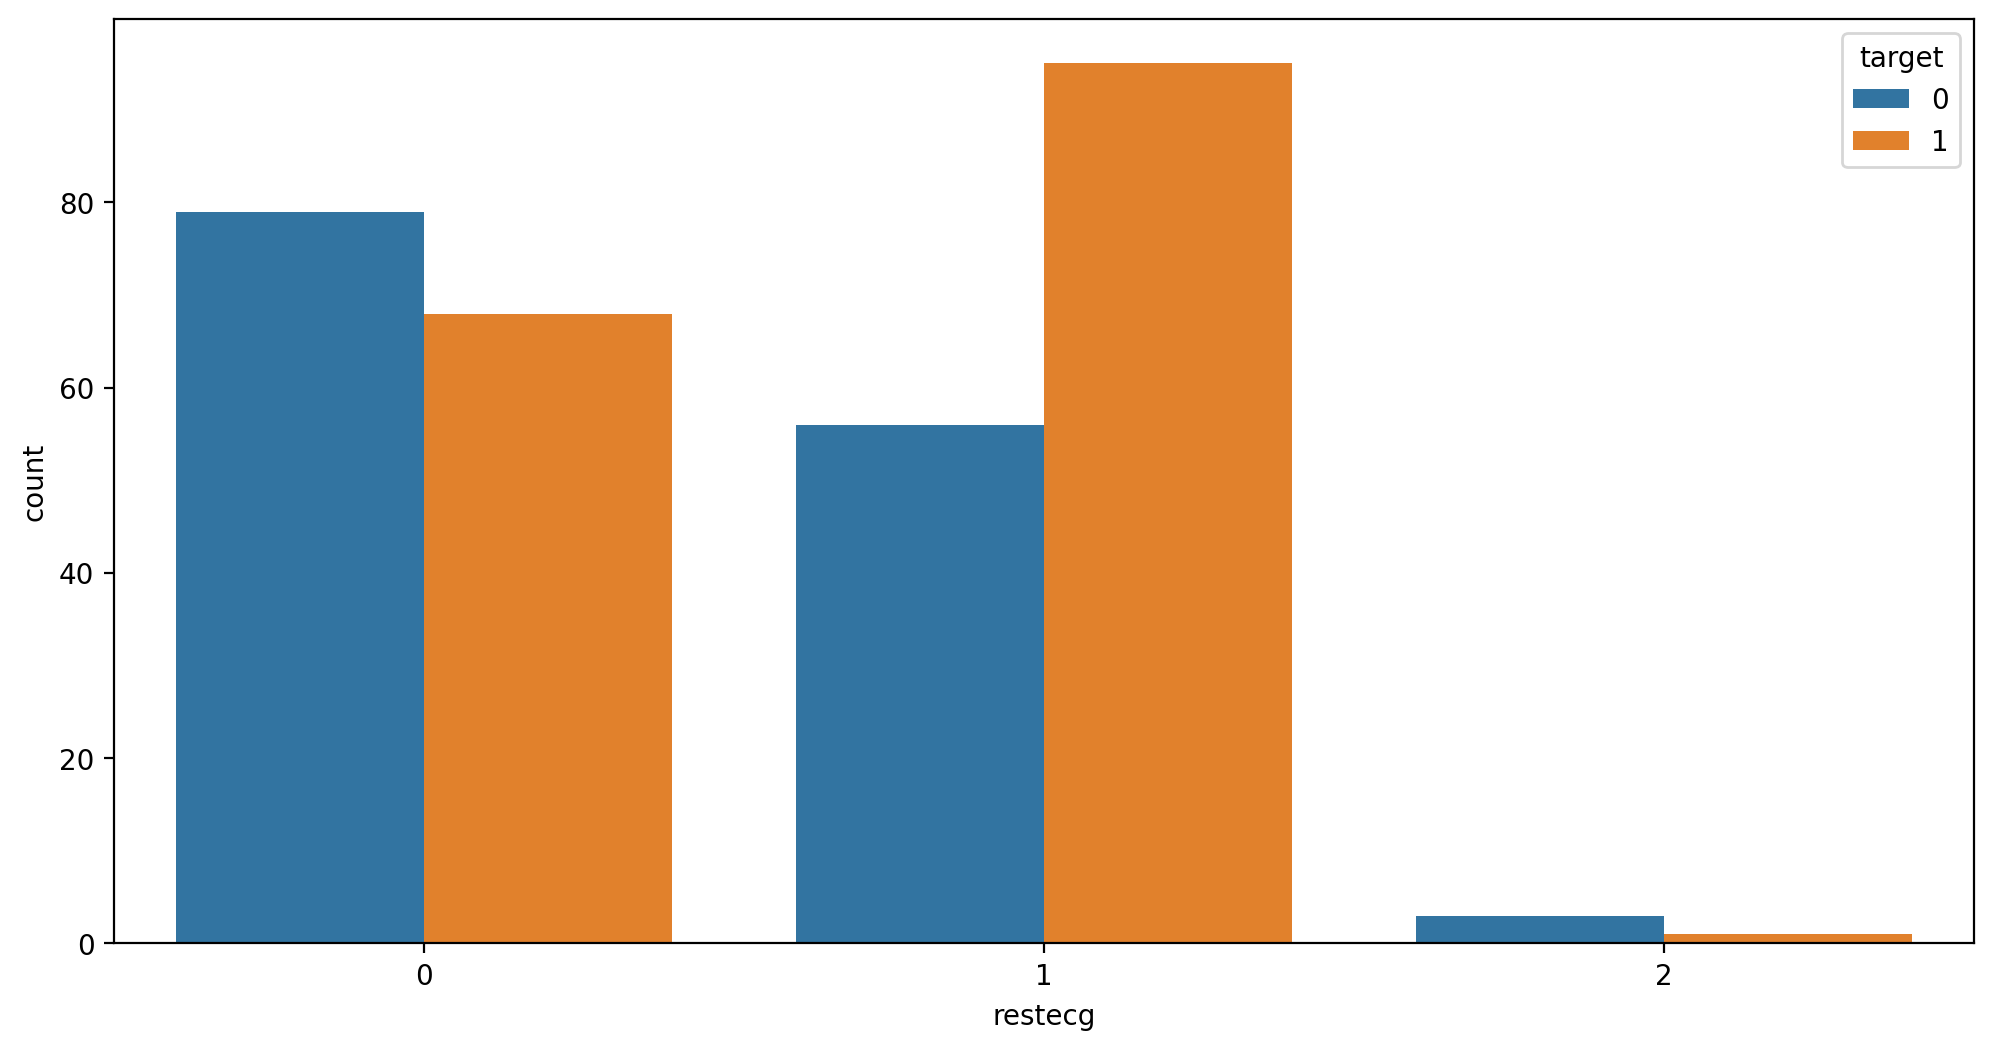

In [46]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('restecg' ,data=df,hue='target')
plt.show()

In [47]:
df

,age,sex,Chest_pain,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


### ANALYSING exang: Exercise induced angina (1 = yes; 0 = no)


In [48]:
df.exang.unique()

array([0, 1], dtype=int64)

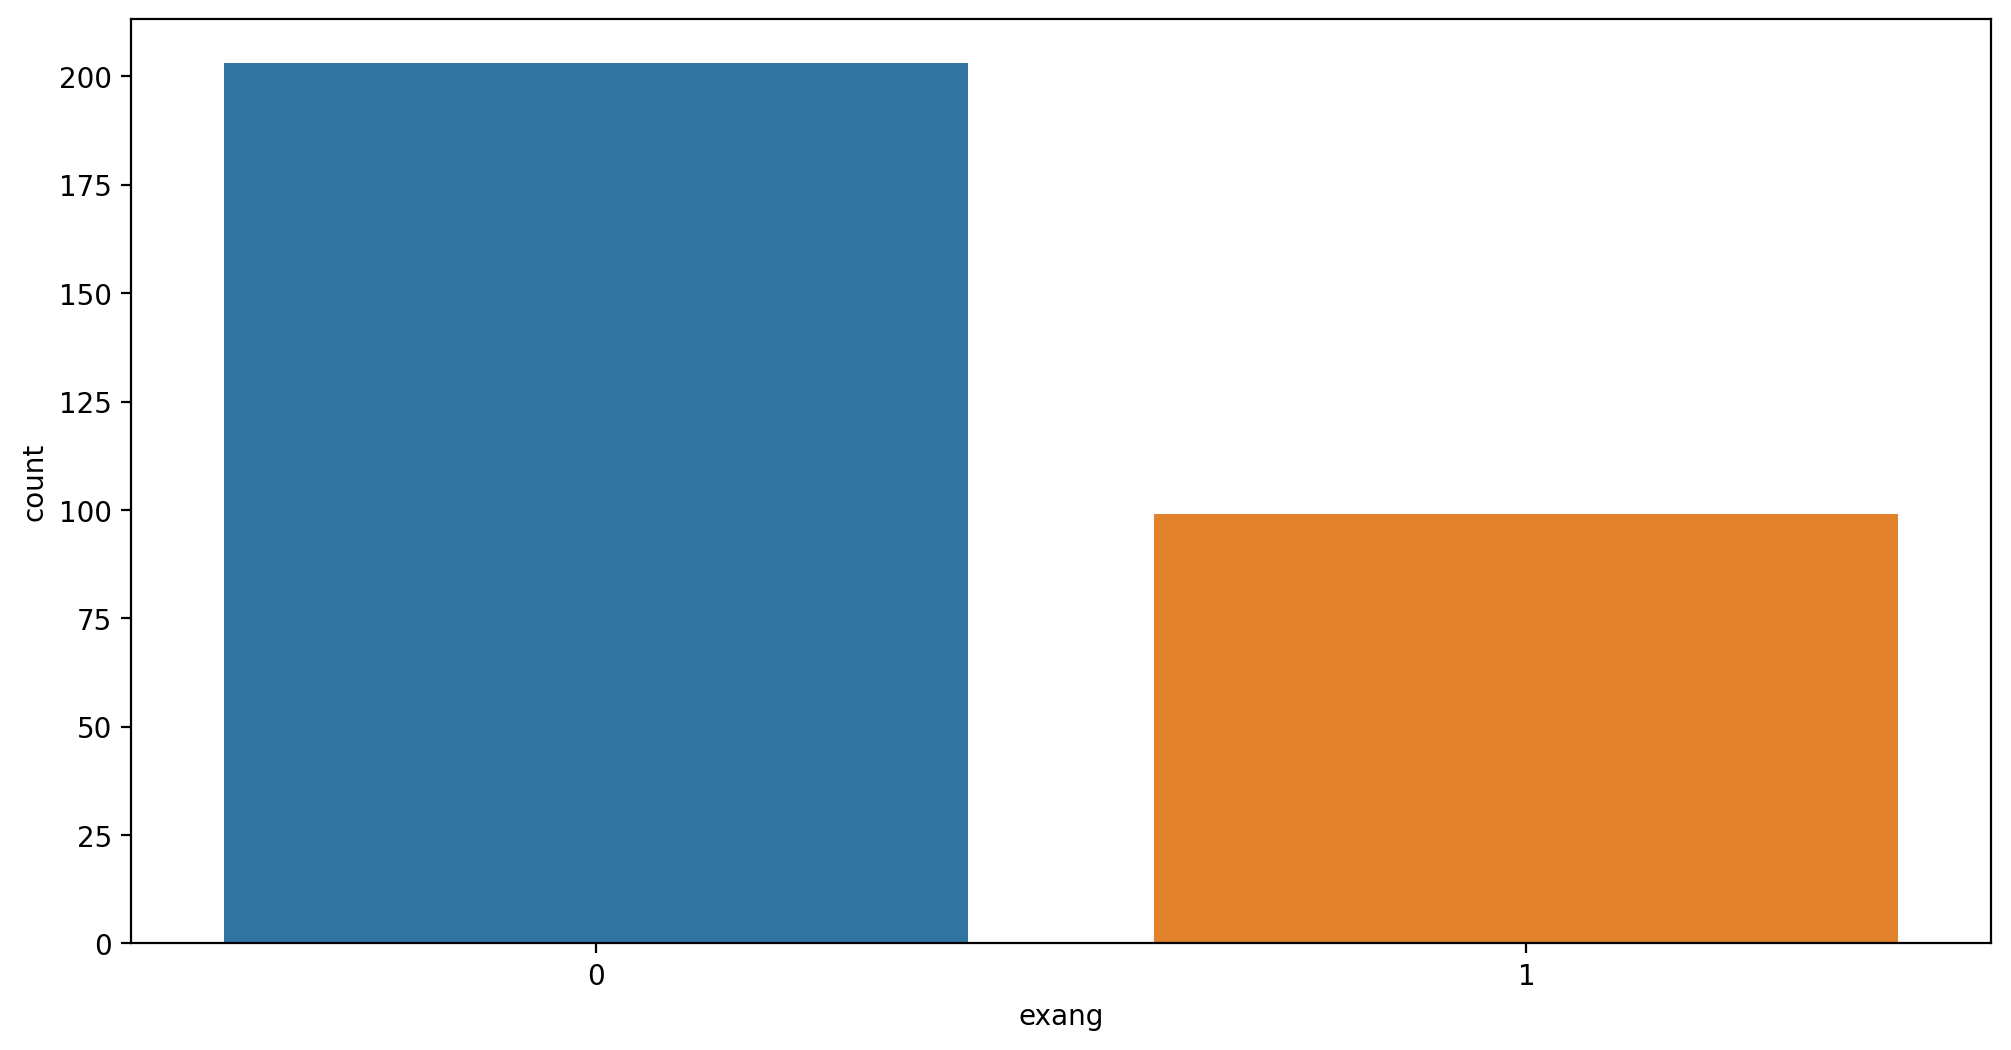

In [49]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('exang' ,data=df)
plt.show()

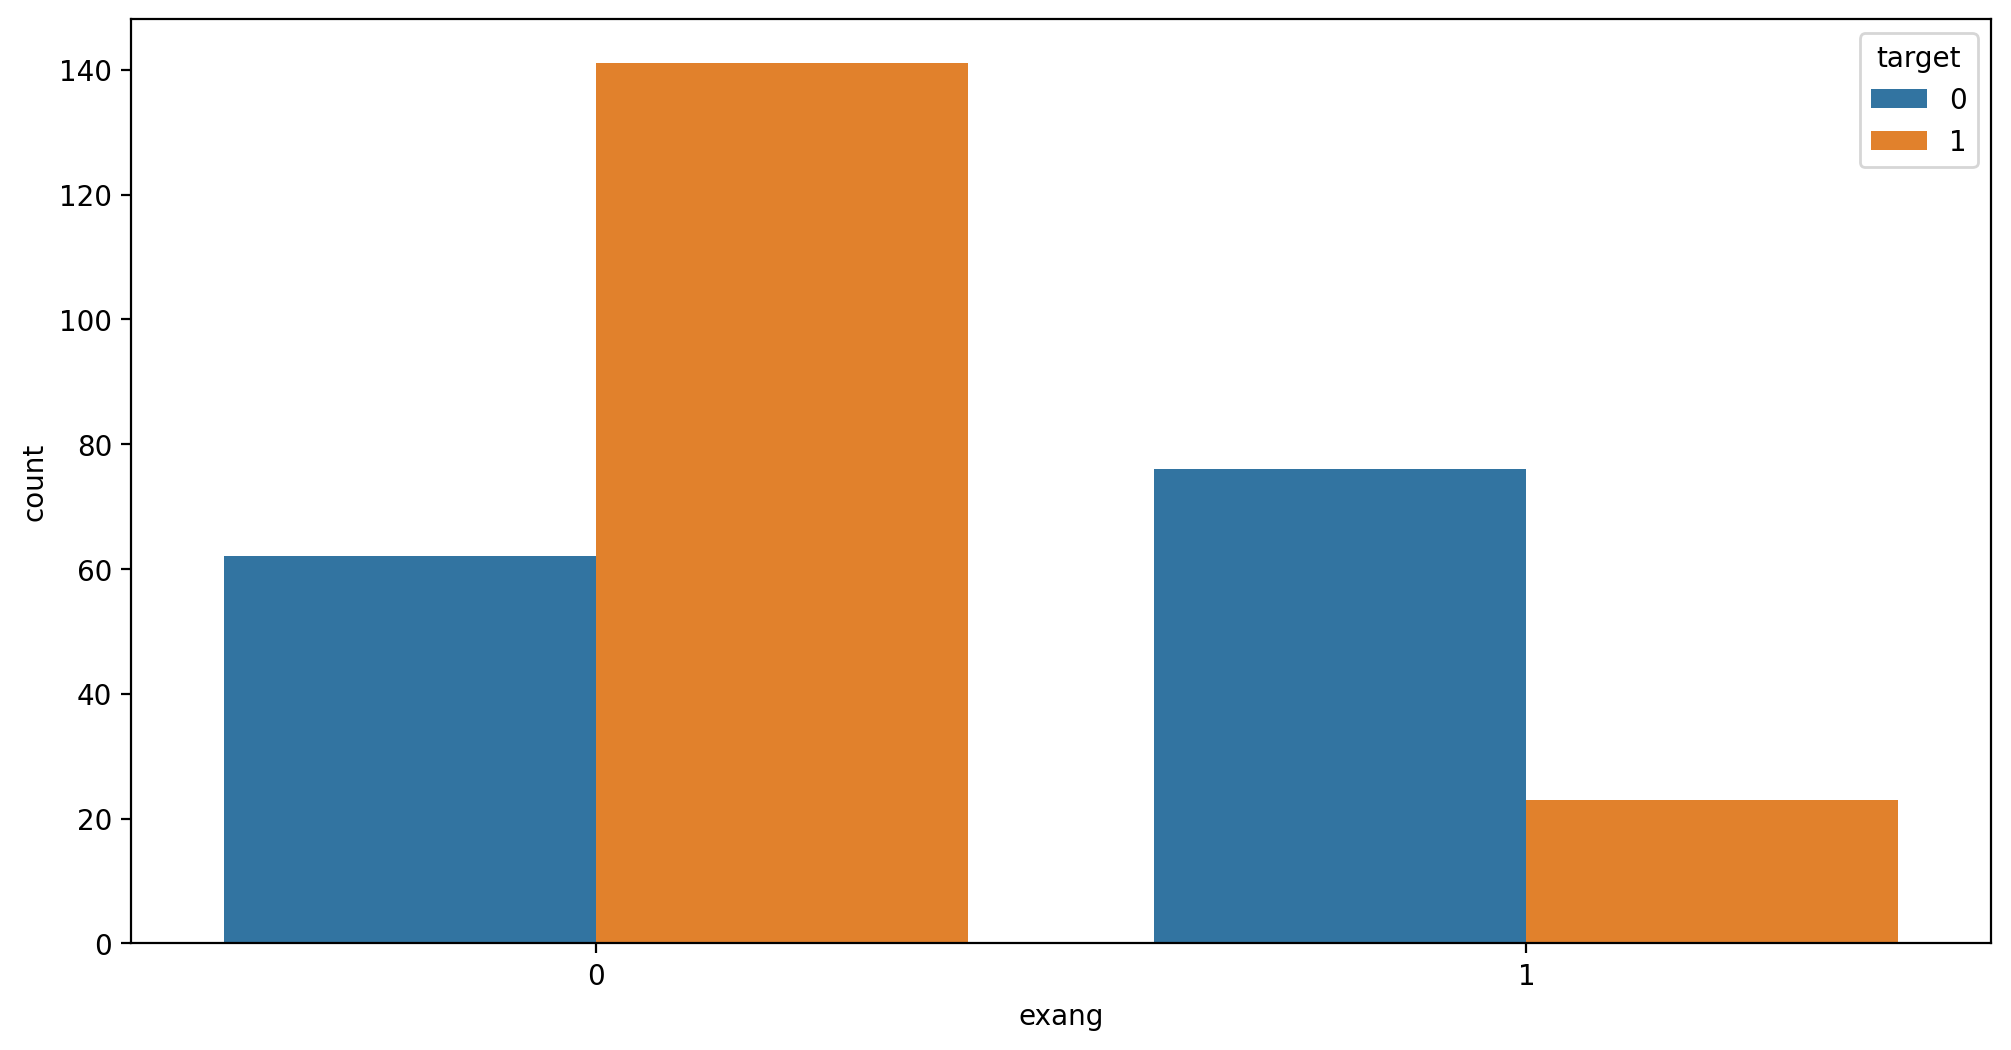

In [50]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('exang' ,data=df,hue='target')
plt.show()

### ANALYSING slope COLUMN ""

In [51]:
df.slope.unique()

array([2, 0, 1], dtype=int64)

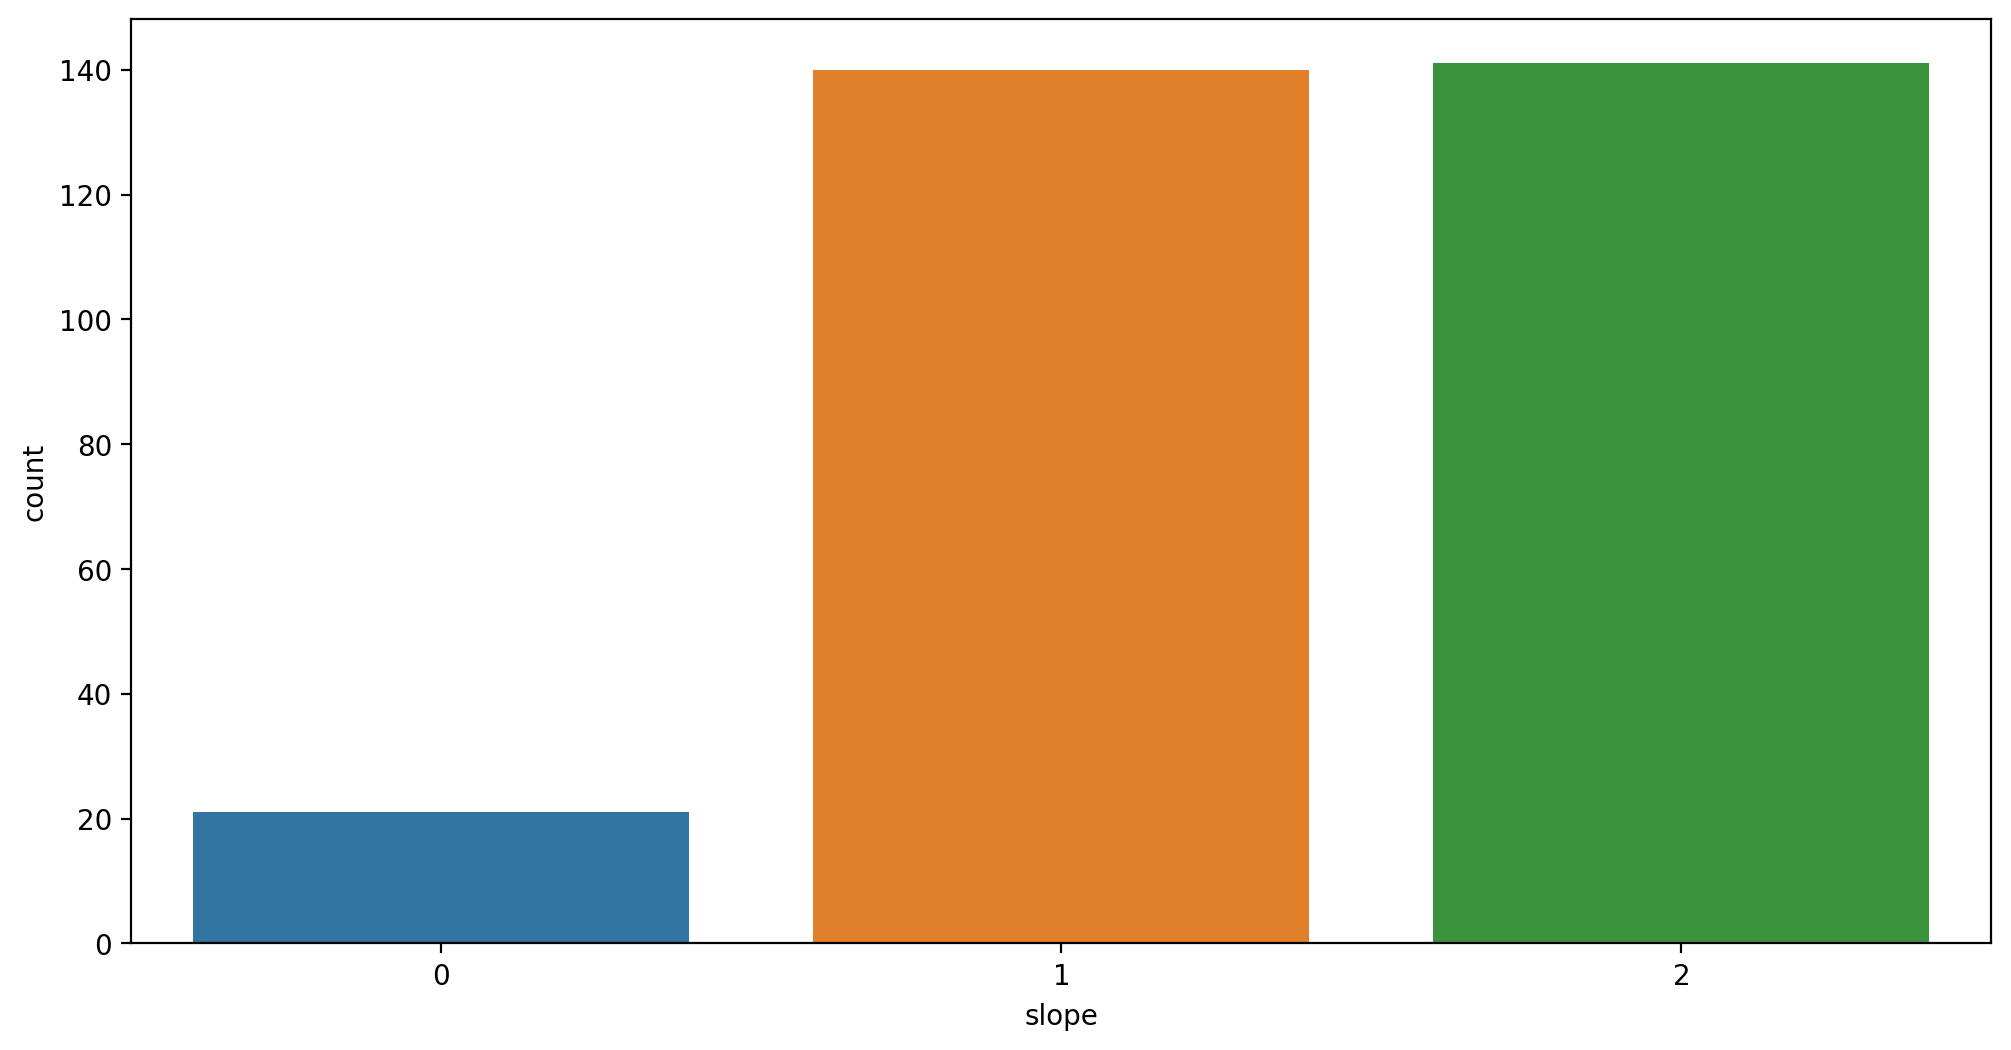

In [52]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('slope' ,data=df)
plt.show()

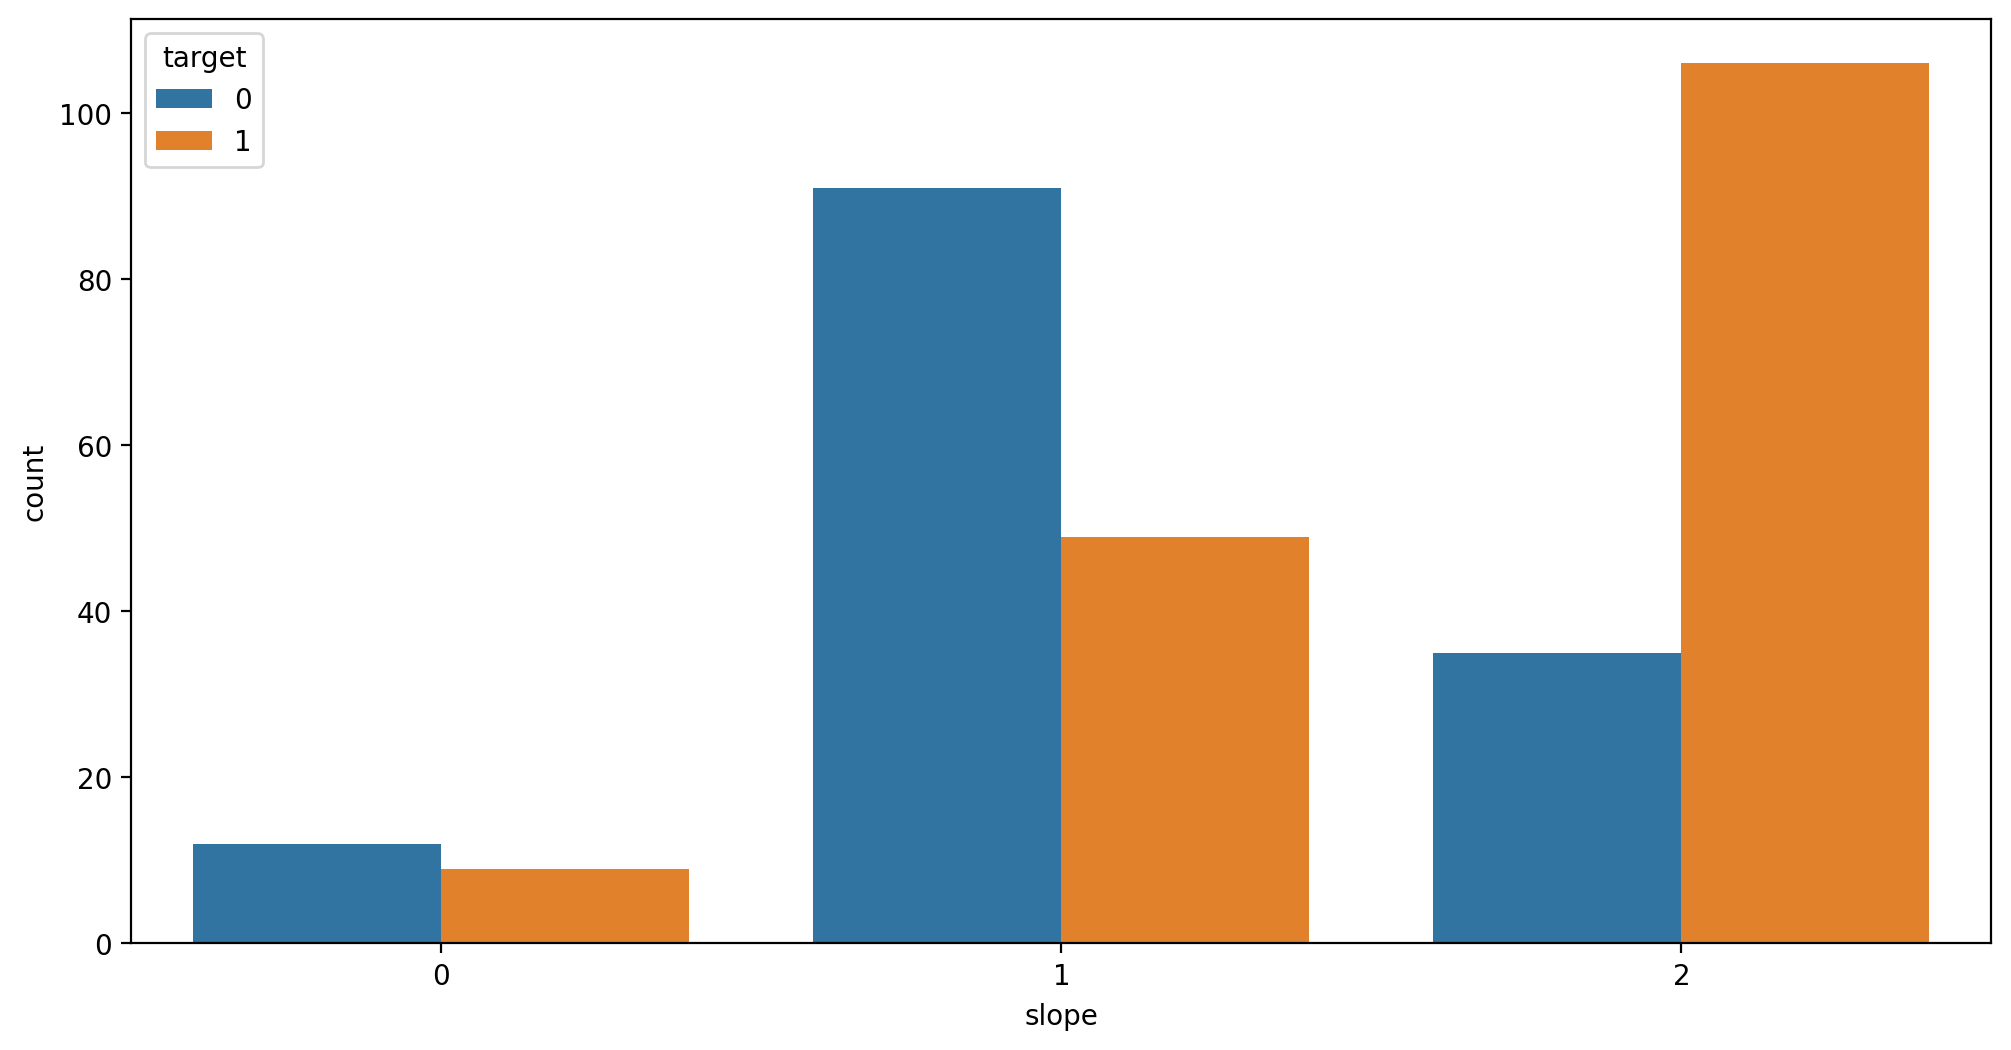

In [53]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('slope' ,data=df,hue='target')
plt.show()

In [54]:
df.groupby('target')['slope'].value_counts()

target  slope
0       1         91
        2         35
        0         12
1       2        106
        1         49
        0          9
Name: slope, dtype: int64

(Value 1: upsloping, Value 2: flat, Value 3: downsloping)

### ANALYSING ca COLUMN ""

In [55]:
df.ca.unique()

array([2, 0, 1, 3, 4], dtype=int64)

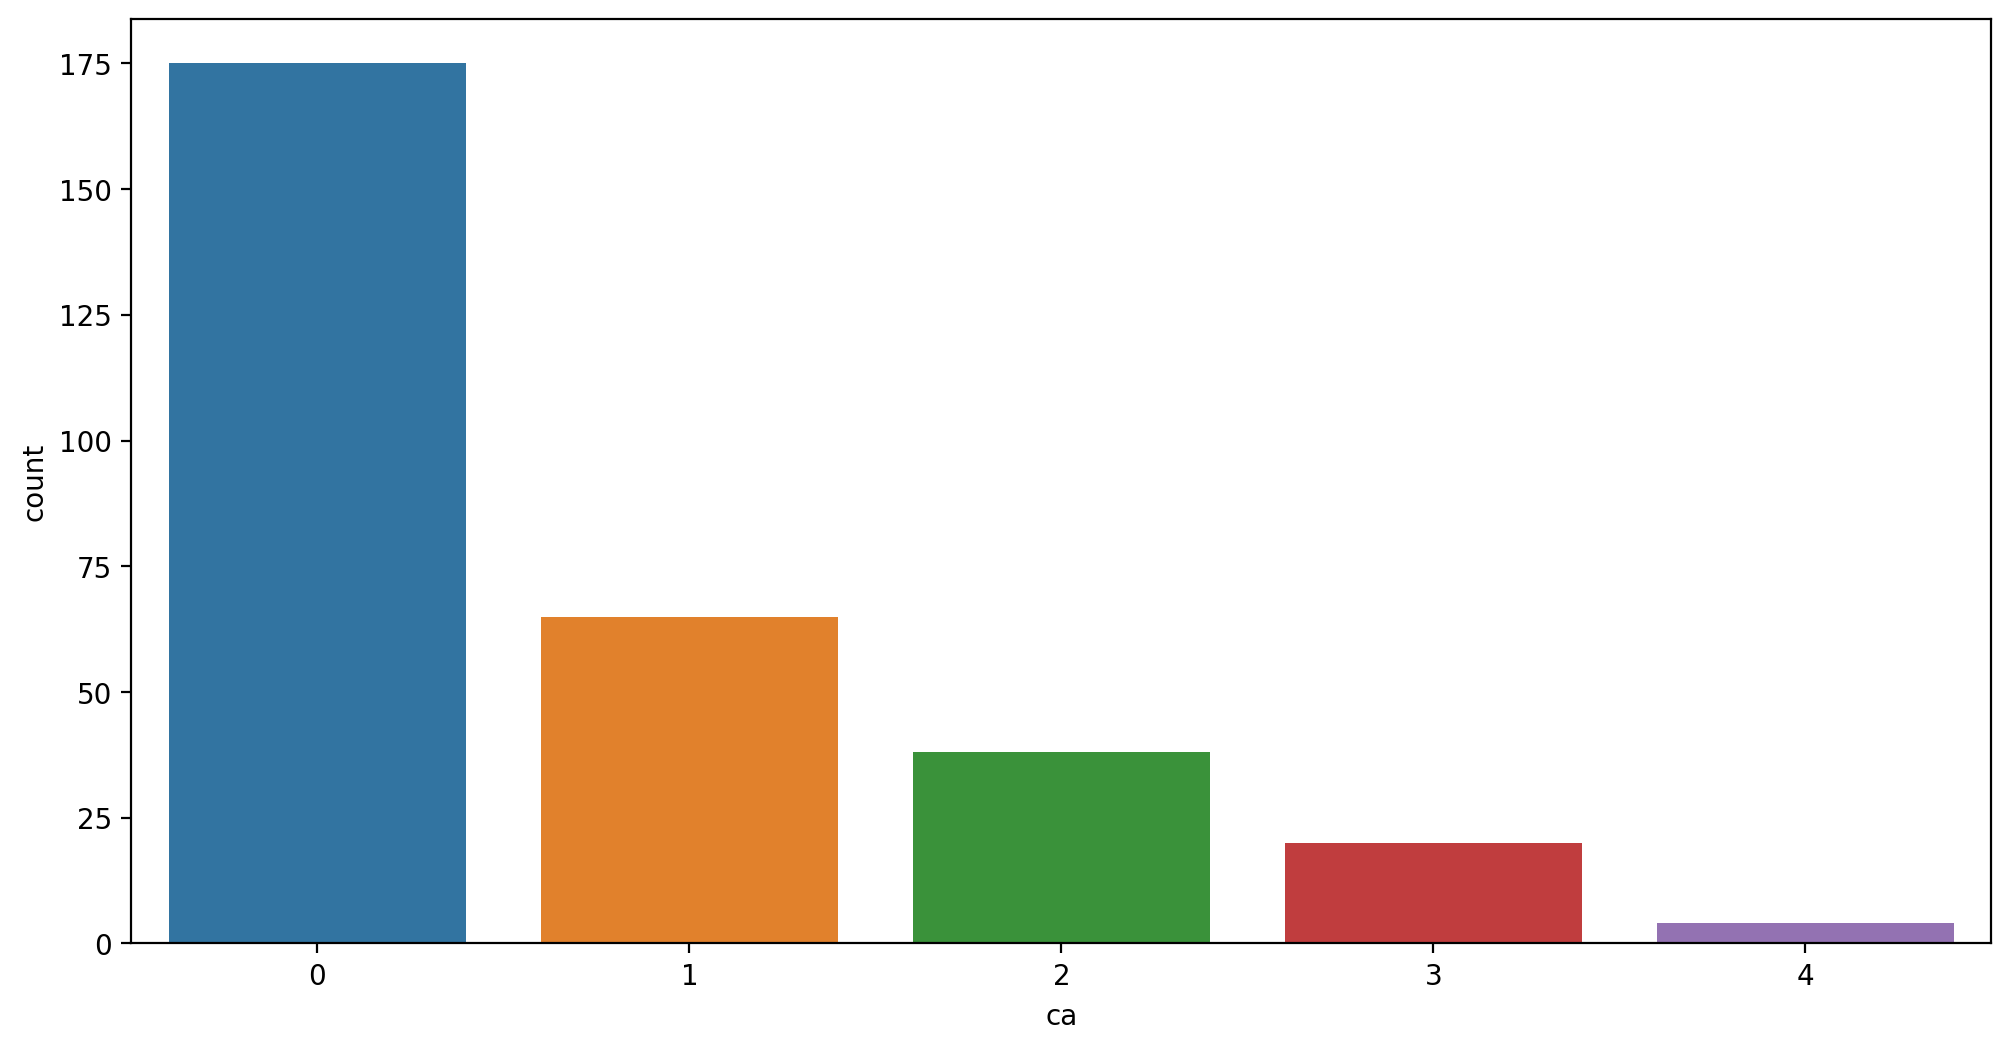

In [56]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('ca' ,data=df)
plt.show()

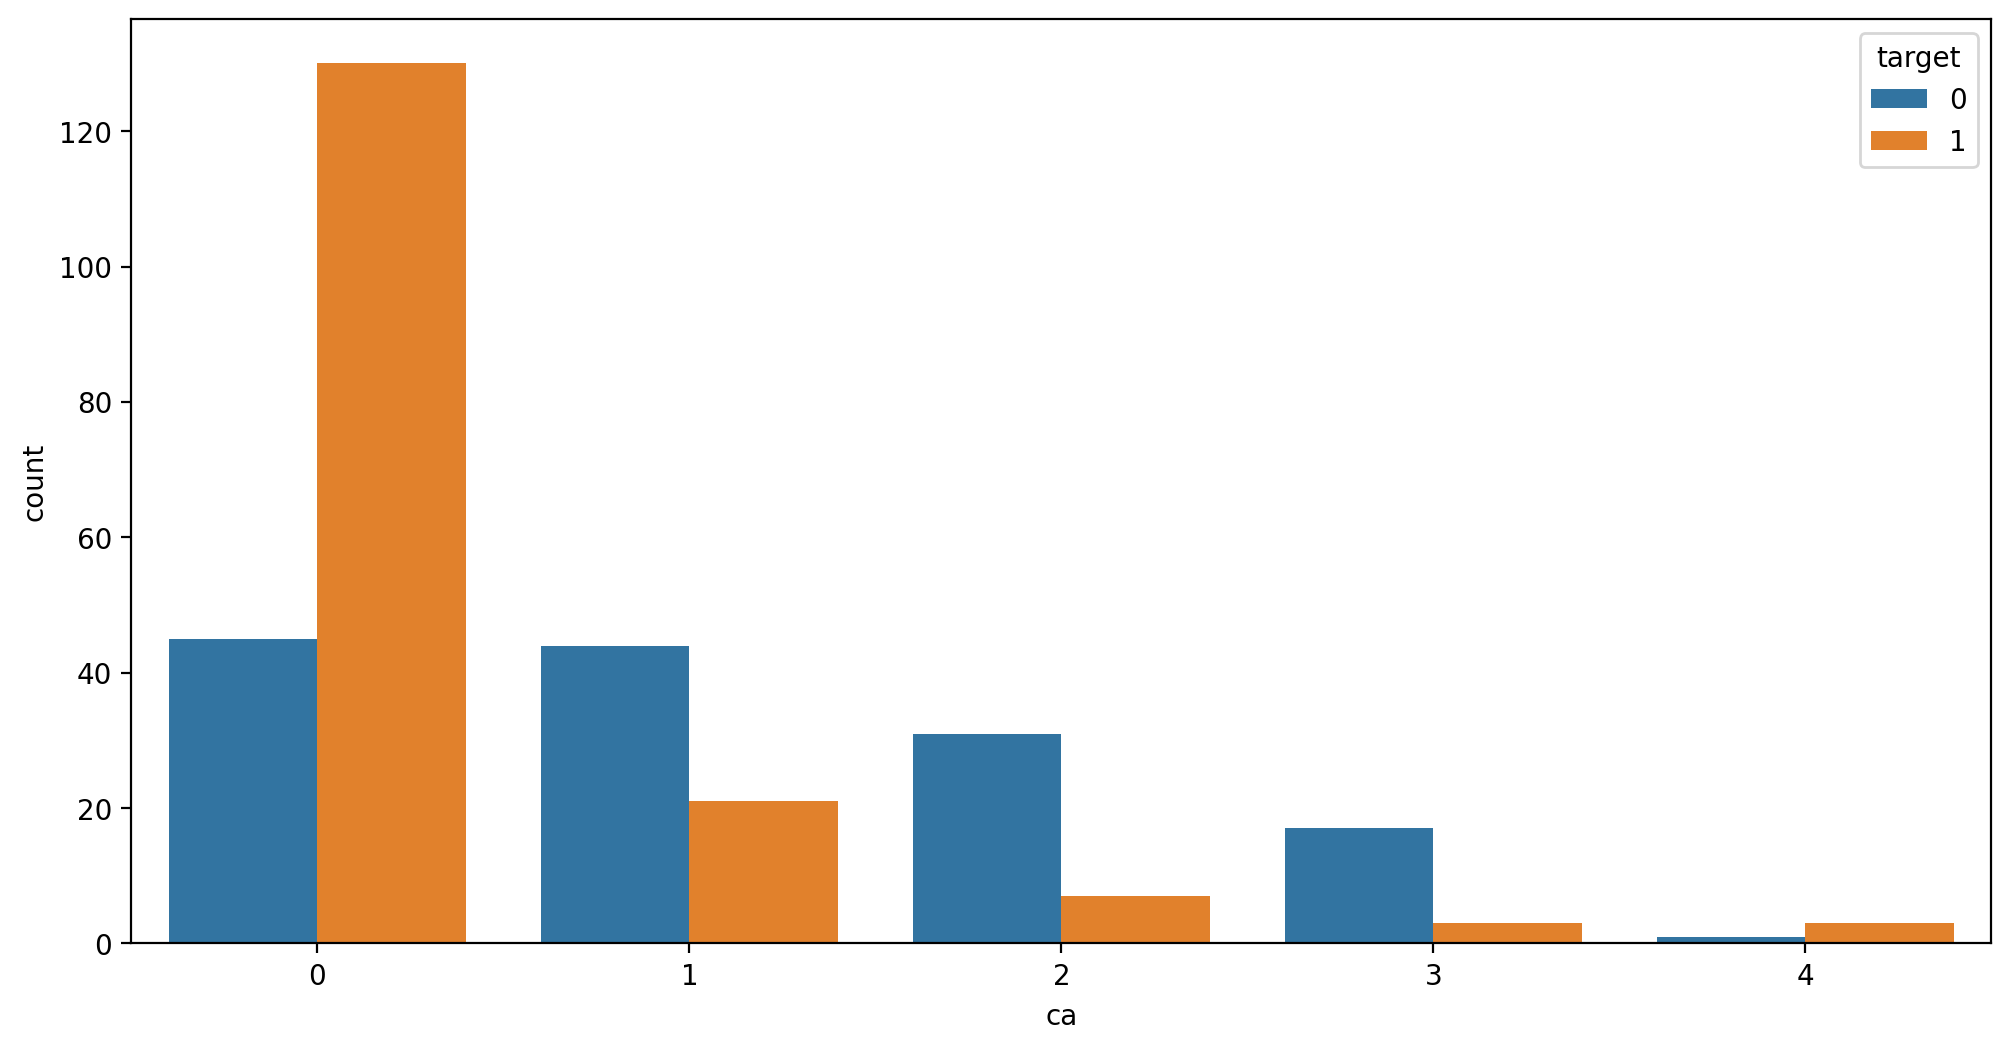

In [57]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('ca' ,data=df,hue='target')
plt.show()

In [58]:
df.groupby('target')['ca'].value_counts()

target  ca
0       0      45
        1      44
        2      31
        3      17
        4       1
1       0     130
        1      21
        2       7
        3       3
        4       3
Name: ca, dtype: int64

### ANALYSING thal COLUMN

In [59]:
df.thal.unique()

array([3, 2, 1, 0], dtype=int64)

0 = normal; 1 = fixed defect; 2 = reversable defect

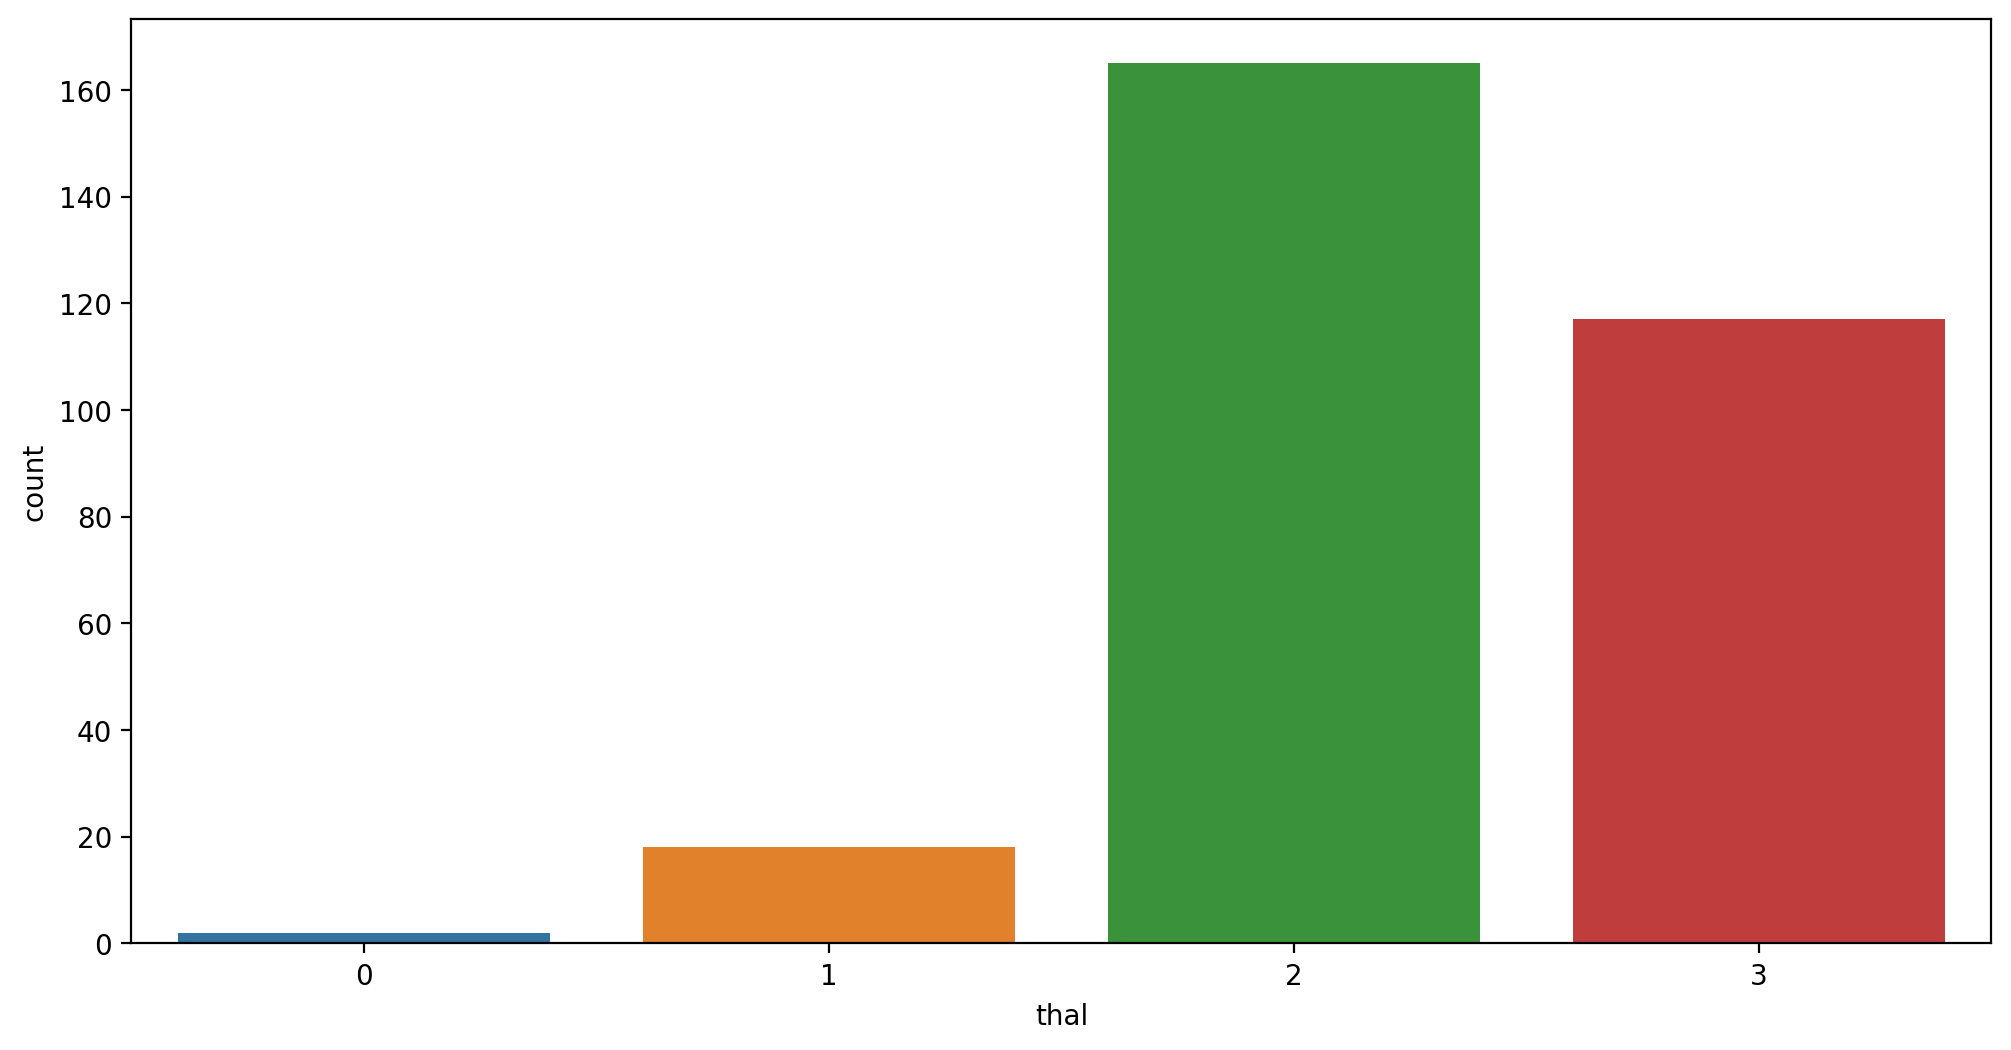

In [60]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('thal' ,data=df)
plt.show()

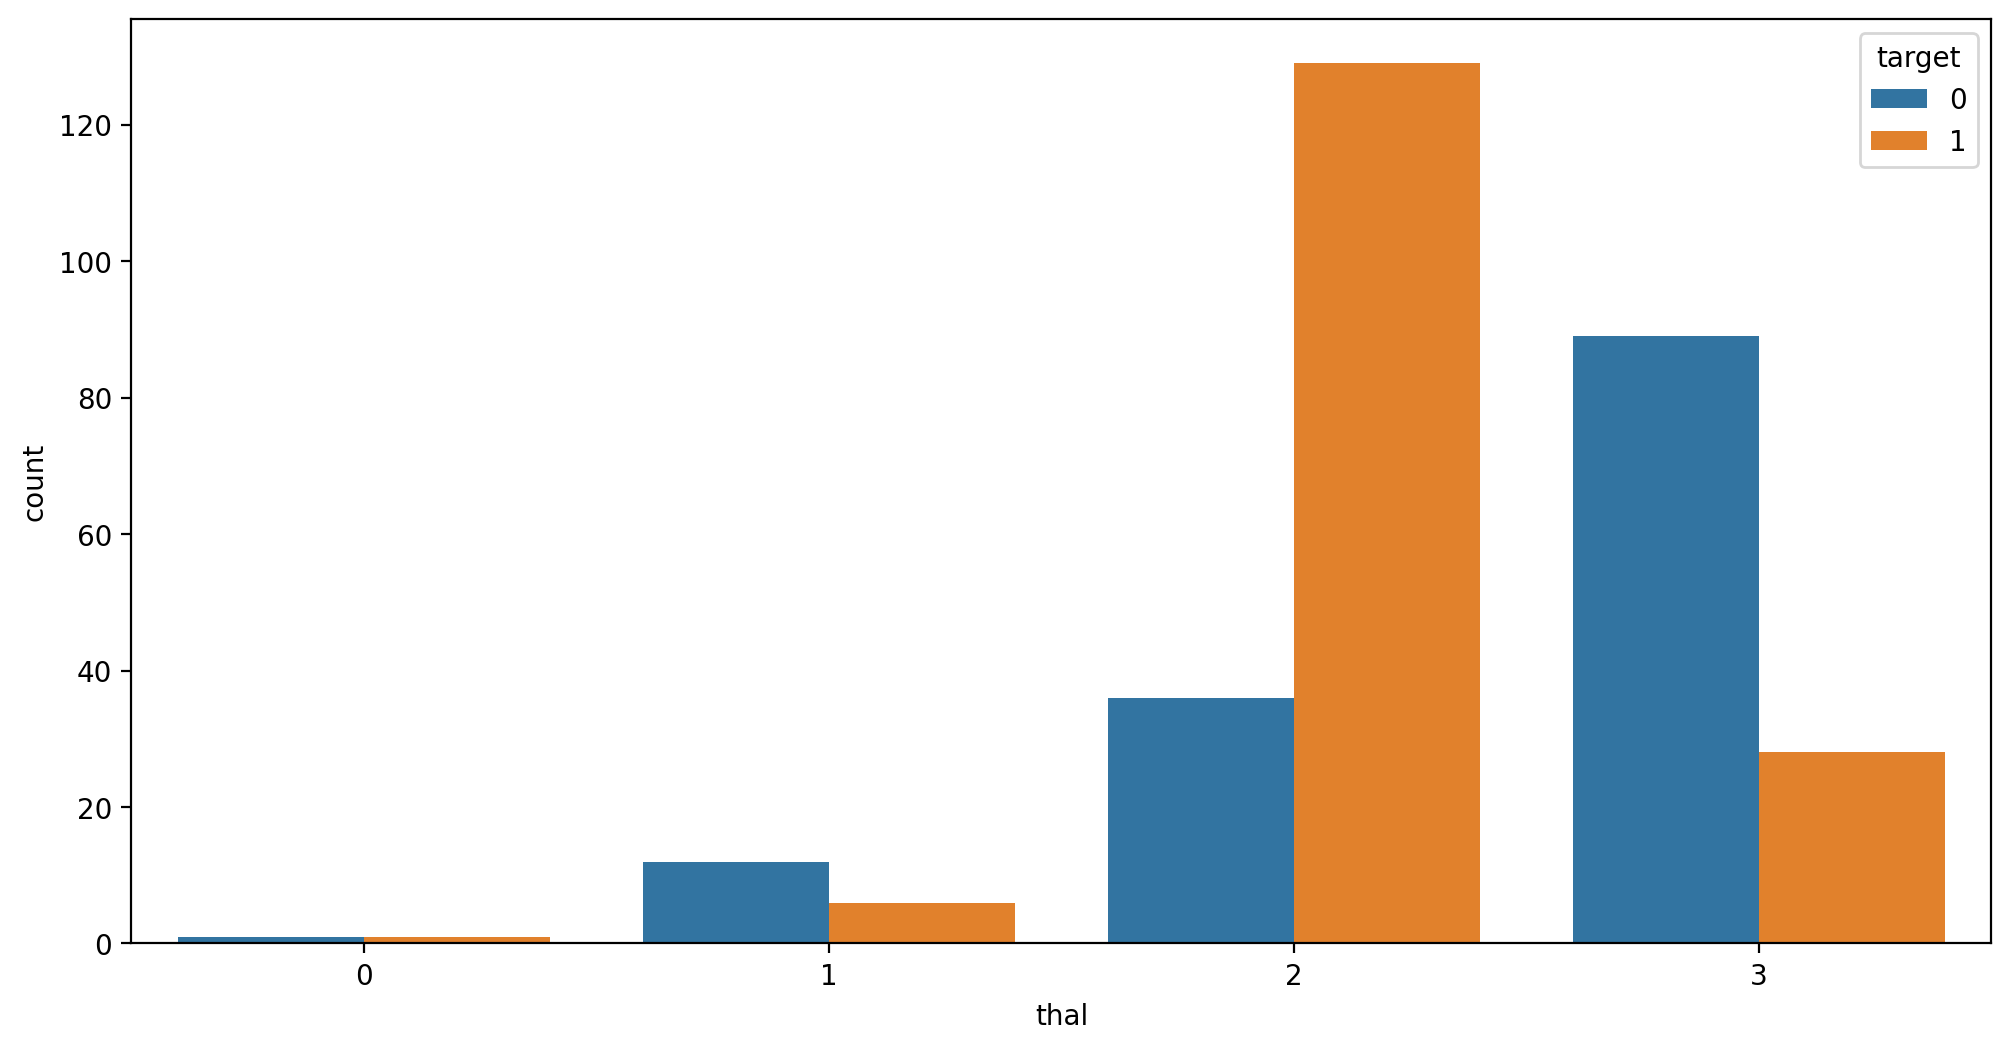

In [61]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot('thal' ,data=df,hue='target')
plt.show()

In [62]:
df.groupby('target')['thal'].value_counts()

target  thal
0       3        89
        2        36
        1        12
        0         1
1       2       129
        3        28
        1         6
        0         1
Name: thal, dtype: int64

## PERCENTAGE OF PARENTS WITH DISEASE AND WITHOUT DISEASE

In [63]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

In [64]:
d = df.target.value_counts()
print(f"Percentage of patience without Heart Problems: ",format(d[0]/len(df)*100, ".2f"),"%")
print(f"Percentage of patience with Heart Problems   : ",format(d[1]/len(df)*100, ".2f"),"%")

Percentage of patience without Heart Problems:  45.70 %
Percentage of patience with Heart Problems   :  54.30 %


## CHECKING CORRELATION

In [65]:
df.corr()

,age,sex,Chest_pain,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
Chest_pain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fasting_blood_sugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


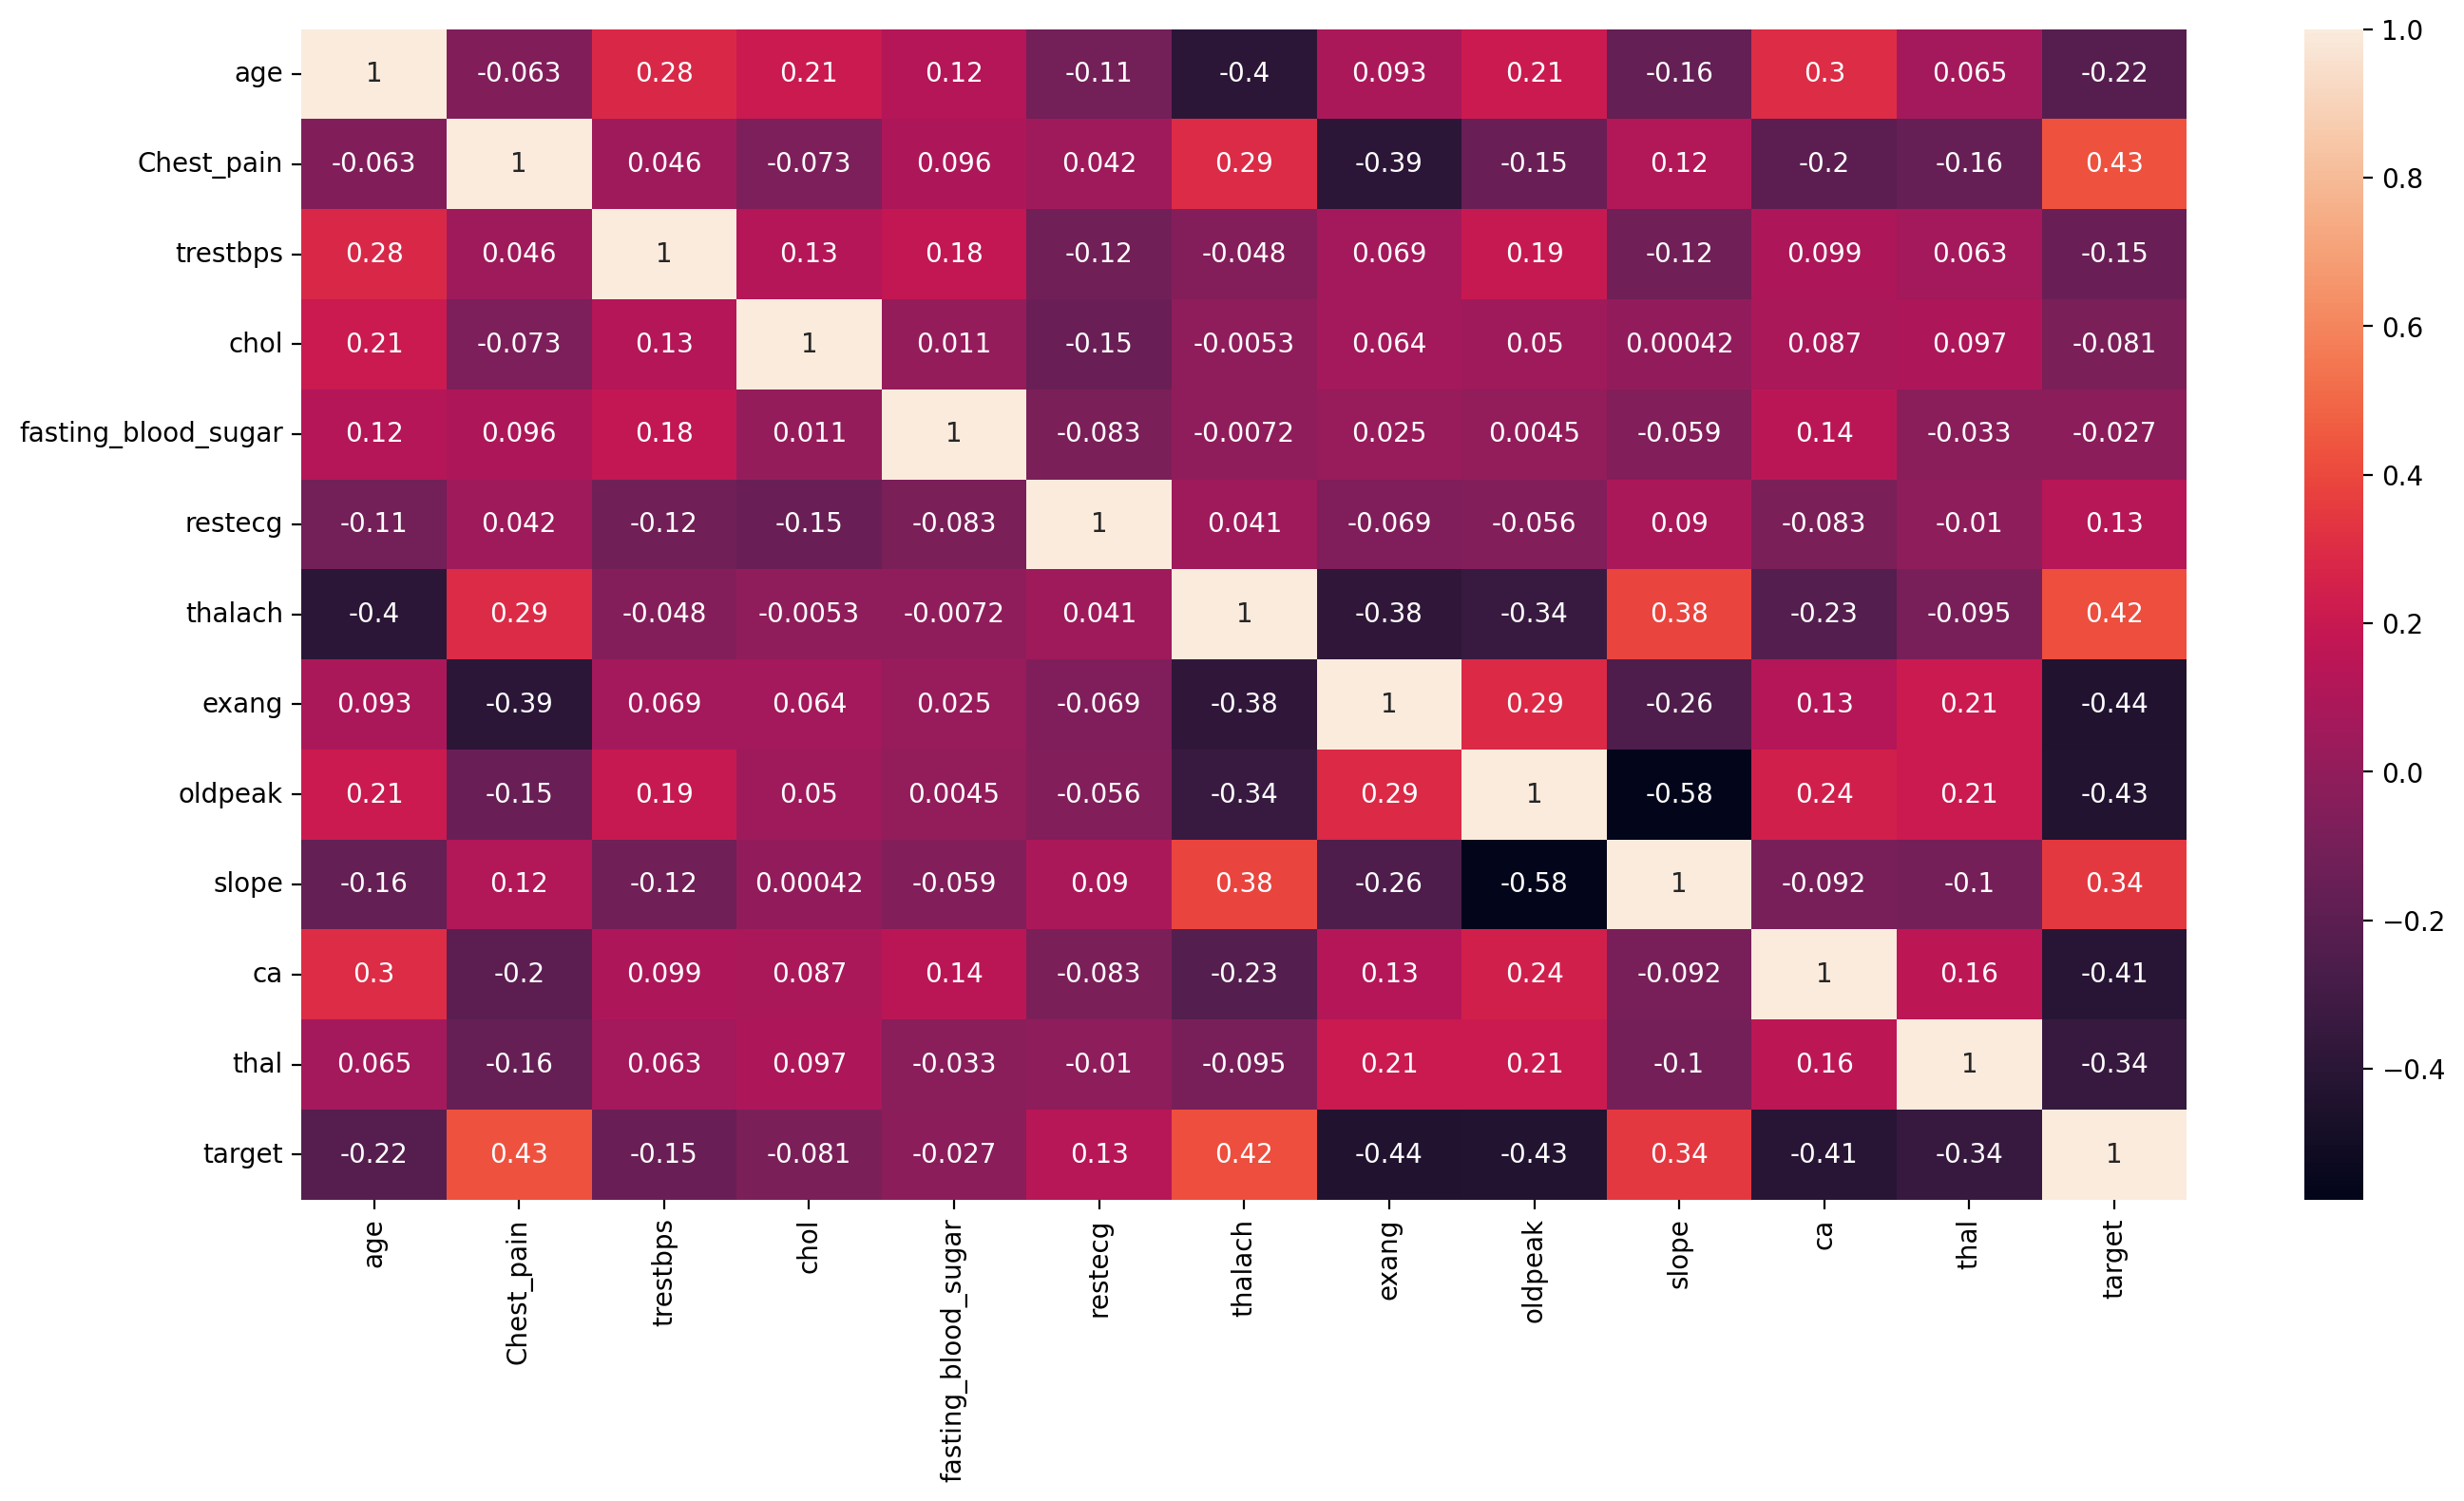

In [66]:
s=(['age', 'Chest_pain', 'trestbps', 'chol', 'fasting_blood_sugar','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target'])
t=df[s].corr()
plt.figure(figsize=(16,8),dpi= 200)
sns.heatmap(t, annot=True)
plt.show()

<Figure size 3200x3200 with 0 Axes>

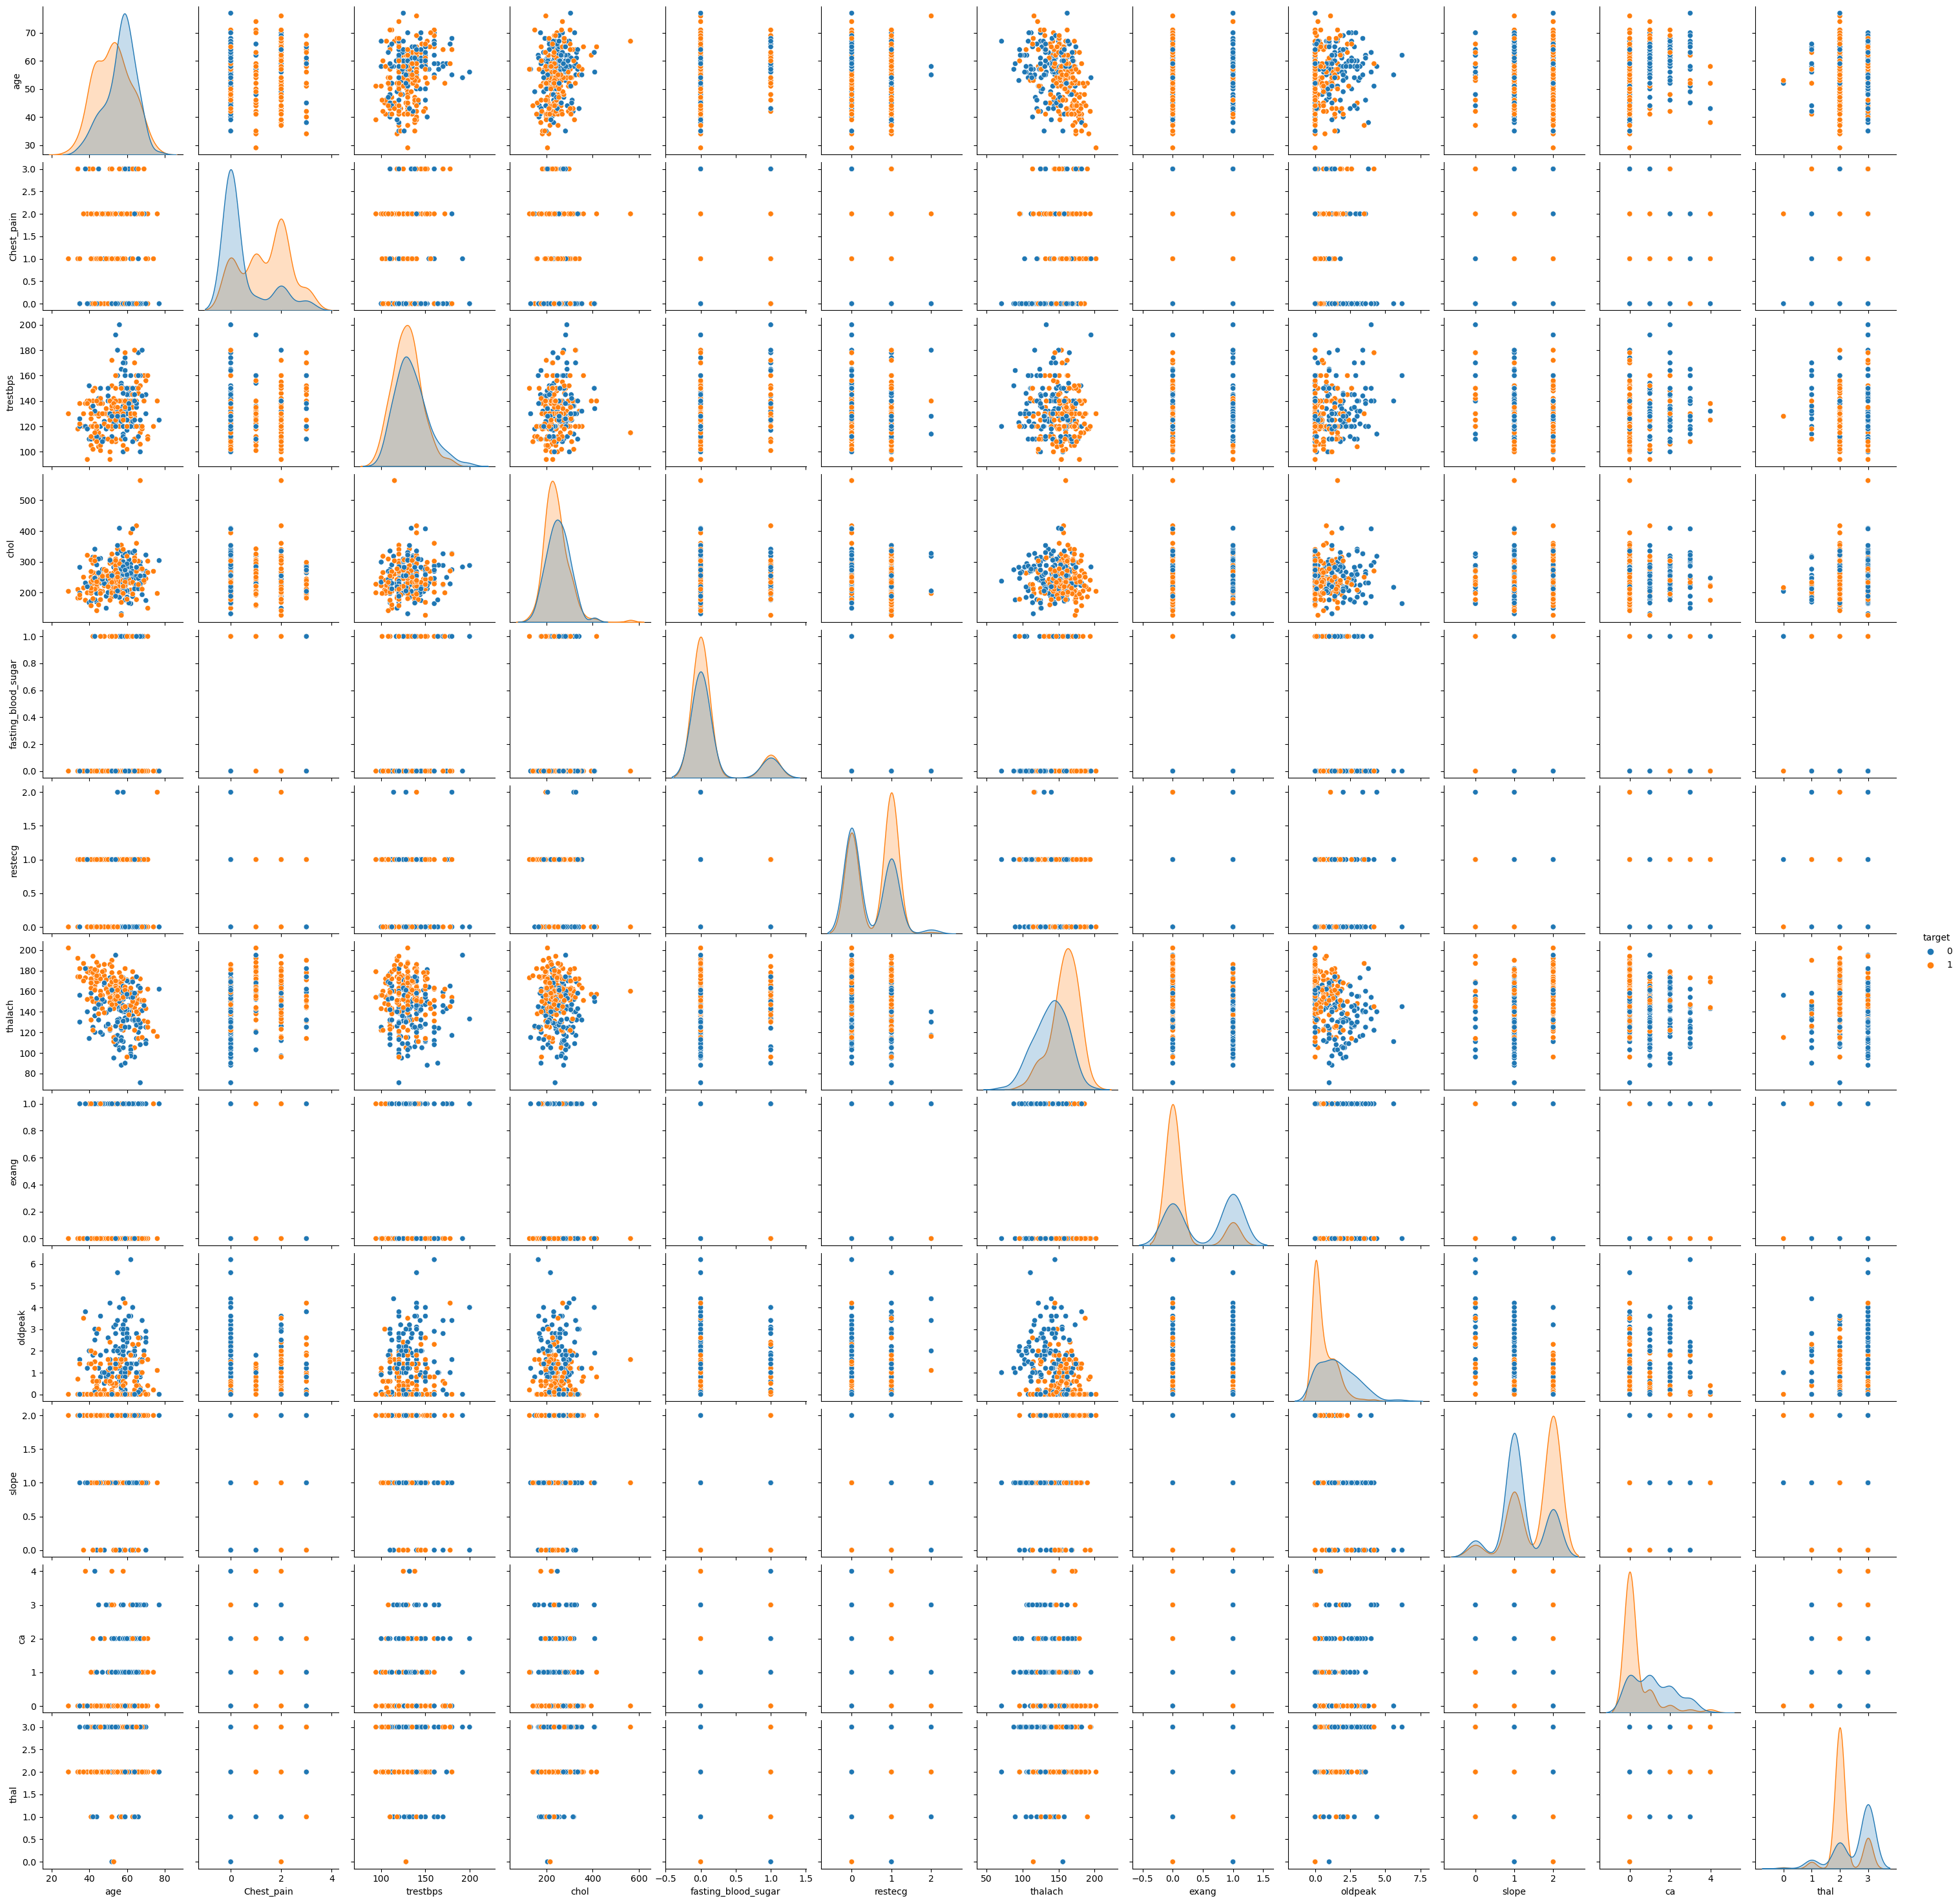

In [67]:
s=(['age', 'Chest_pain', 'trestbps', 'chol', 'fasting_blood_sugar','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target'])
t=df[s]
plt.figure(figsize=(16,16),dpi= 200)
sns.pairplot(data=t,hue ='target')
plt.show()

##  ----------------------------------------------------------------------------------------------------------

### INDEPENDENT FEATURE SET 

In [107]:
cols = ['age', 'Chest_pain', 'trestbps', 'chol', 'fasting_blood_sugar','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[cols]
X.head(5)


,age,Chest_pain,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,0,125,212,0,1,168,0,1.0,2,2,3
1,53,0,140,203,1,0,155,1,3.1,0,0,3
2,70,0,145,174,0,1,125,1,2.6,0,0,3
3,61,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,138,294,1,1,106,0,1.9,1,3,2


## DEPENDENT FEATURE SET

In [76]:
Y=df['target']
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [108]:
print("The Shape Of Indepenedent Feature set : ",X.shape)
print("The Shape Of Depenedent Feature set : ",Y.shape)

The Shape Of Indepenedent Feature set :  (302, 12)
The Shape Of Depenedent Feature set :  (302,)


In [109]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state = 5)

In [110]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape )

Training data shape   :  (211, 12)
Training labels shape :  (211,)
Testing data shape    :  (91, 12)
Testing labels shape  :  (91,)


In [111]:
# Training a machine learning model
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train, y_train)

LogisticRegression()

In [112]:
# Evaluating the model
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

In [113]:
from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Set Accuracy : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.8862559241706162
Testing  Set Accuracy :  0.8131868131868132
